## Example: Inverse design specific effective elastic modulus via GNN
While keeping the relative density constant

#### Load packages

In [1]:
import torch
import dgl
from pyLattice2D.models.MPNN.networks import LatticeGNNMasked
import numpy as np
import matplotlib.pyplot as plt
from pyLattice2D.models.Lattice import DifferentiableLattice
from pyLattice2D.models.FEM import FEModel
from pyLattice2D.methods.mechanical_properties import get_Yprop
from pyLattice2D.utils.record import RecordAndSave
from tqdm import trange

#### Load pre-trained GNN model

In [7]:
model = LatticeGNNMasked(150)

# stiffness values were rescaled for training the network using the following parameters
min_stiff, max_stiff = 16473179.0, 12587014053.0

checkpoint = torch.load('GNN.pt')
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

#### Convenience function for creating lattice in a format compatible with the GNN

In [8]:
def turn_lat_to_NN(lat, self_loop = True):
    coords = lat.coordinates
    edges = lat.active_edges
    
    new_edges = []
    for ed in edges:
        new_edges.append(list(ed))
        new_edges.append([ed[1], ed[0]])
    new_edges = np.array(new_edges)

    lattice_graph = dgl.graph((new_edges[:,0], new_edges[:,1]))
    if self_loop == True:
        lattice_graph = dgl.add_self_loop(lattice_graph)
    lattice_graph.ndata['coords'] = torch.Tensor(coords)
    
    return lattice_graph

#### Create the initial lattice to start the inverse design from

In [9]:
from pyLattice2D.models.Lattice import DifferentiableLattice

lattice_setup = {'type': 'triangle',
                 'num': 11, 
                 'seed': 1224,
                 'remove_nodes': 0,
                 'remove_edges': 0.,
                 'move_nodes': [0., 0.8],
                 'add_edges': [0, 0.2],
                 'BeamCrossArea_A': 2e-5,
                'YoungsModulus_E': 200*1e9,
                'oversaturate_edges': None,
                 'edge_mask_init': {'random': True, 'modulating_factor': .2, 'offset': 0., 'train': True,
                                   'gradient': {'function': 'super', 'alpha': 1.}},
                 'train_coordinates': True,
                }

lat = DifferentiableLattice(lattice_setup)
# turn lattice into the right structure
lat_graph = turn_lat_to_NN(lat)

#### Plot the starting lattice

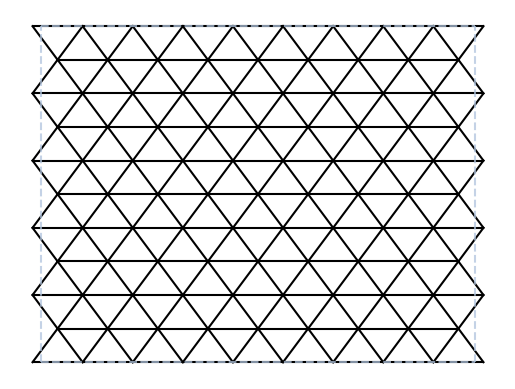

In [10]:
lat.draw_lattice()

#### Run the inverse design

/home/dodo/anaconda3/envs/pylat/lib/python3.8/site-packages/dgl/backend/pytorch/tensor.py:445: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (
  0%|                                                                                           | 0/201 [00:00<?, ?it/s]

tensor([0.7426], grad_fn=<ReshapeAliasBackward0>) tensor(0.1362, grad_fn=<MulBackward0>)


/home/dodo/anaconda3/envs/pylat/lib/python3.8/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
  0%|▍                                                                                  | 1/201 [00:01<06:10,  1.85s/it]

tensor([0.7315], grad_fn=<ReshapeAliasBackward0>) tensor(0.1357, grad_fn=<MulBackward0>)
tensor([0.7309], grad_fn=<ReshapeAliasBackward0>) tensor(0.1357, grad_fn=<MulBackward0>)
tensor([0.7304], grad_fn=<ReshapeAliasBackward0>) tensor(0.1357, grad_fn=<MulBackward0>)
tensor([0.7298], grad_fn=<ReshapeAliasBackward0>) tensor(0.1357, grad_fn=<MulBackward0>)


  3%|██▍                                                                                | 6/201 [00:03<01:43,  1.89it/s]

tensor([0.7291], grad_fn=<ReshapeAliasBackward0>) tensor(0.1357, grad_fn=<MulBackward0>)
tensor([0.7210], grad_fn=<ReshapeAliasBackward0>) tensor(0.1352, grad_fn=<MulBackward0>)
tensor([0.7148], grad_fn=<ReshapeAliasBackward0>) tensor(0.1347, grad_fn=<MulBackward0>)
tensor([0.7246], grad_fn=<ReshapeAliasBackward0>) tensor(0.1352, grad_fn=<MulBackward0>)
tensor([0.7293], grad_fn=<ReshapeAliasBackward0>) tensor(0.1352, grad_fn=<MulBackward0>)


  5%|████▍                                                                             | 11/201 [00:05<01:18,  2.42it/s]

tensor([0.7138], grad_fn=<ReshapeAliasBackward0>) tensor(0.1347, grad_fn=<MulBackward0>)
tensor([0.7134], grad_fn=<ReshapeAliasBackward0>) tensor(0.1347, grad_fn=<MulBackward0>)
tensor([0.7036], grad_fn=<ReshapeAliasBackward0>) tensor(0.1342, grad_fn=<MulBackward0>)
tensor([0.7107], grad_fn=<ReshapeAliasBackward0>) tensor(0.1347, grad_fn=<MulBackward0>)
tensor([0.6878], grad_fn=<ReshapeAliasBackward0>) tensor(0.1338, grad_fn=<MulBackward0>)


  8%|██████▌                                                                           | 16/201 [00:06<01:08,  2.68it/s]

tensor([0.6875], grad_fn=<ReshapeAliasBackward0>) tensor(0.1338, grad_fn=<MulBackward0>)
tensor([0.6785], grad_fn=<ReshapeAliasBackward0>) tensor(0.1333, grad_fn=<MulBackward0>)
tensor([0.6634], grad_fn=<ReshapeAliasBackward0>) tensor(0.1323, grad_fn=<MulBackward0>)
tensor([0.6702], grad_fn=<ReshapeAliasBackward0>) tensor(0.1328, grad_fn=<MulBackward0>)
tensor([0.6623], grad_fn=<ReshapeAliasBackward0>) tensor(0.1323, grad_fn=<MulBackward0>)


 10%|████████▌                                                                         | 21/201 [00:08<01:04,  2.80it/s]

tensor([0.6609], grad_fn=<ReshapeAliasBackward0>) tensor(0.1318, grad_fn=<MulBackward0>)
tensor([0.6606], grad_fn=<ReshapeAliasBackward0>) tensor(0.1318, grad_fn=<MulBackward0>)
tensor([0.6494], grad_fn=<ReshapeAliasBackward0>) tensor(0.1314, grad_fn=<MulBackward0>)
tensor([0.6491], grad_fn=<ReshapeAliasBackward0>) tensor(0.1314, grad_fn=<MulBackward0>)
tensor([0.6571], grad_fn=<ReshapeAliasBackward0>) tensor(0.1319, grad_fn=<MulBackward0>)


 13%|██████████▌                                                                       | 26/201 [00:10<01:01,  2.87it/s]

tensor([0.6565], grad_fn=<ReshapeAliasBackward0>) tensor(0.1319, grad_fn=<MulBackward0>)
tensor([0.6633], grad_fn=<ReshapeAliasBackward0>) tensor(0.1324, grad_fn=<MulBackward0>)
tensor([0.6607], grad_fn=<ReshapeAliasBackward0>) tensor(0.1319, grad_fn=<MulBackward0>)
tensor([0.6511], grad_fn=<ReshapeAliasBackward0>) tensor(0.1314, grad_fn=<MulBackward0>)
tensor([0.6506], grad_fn=<ReshapeAliasBackward0>) tensor(0.1314, grad_fn=<MulBackward0>)


 15%|████████████▋                                                                     | 31/201 [00:11<01:00,  2.81it/s]

tensor([0.6539], grad_fn=<ReshapeAliasBackward0>) tensor(0.1324, grad_fn=<MulBackward0>)
tensor([0.6430], grad_fn=<ReshapeAliasBackward0>) tensor(0.1325, grad_fn=<MulBackward0>)
tensor([0.6424], grad_fn=<ReshapeAliasBackward0>) tensor(0.1325, grad_fn=<MulBackward0>)
tensor([0.6489], grad_fn=<ReshapeAliasBackward0>) tensor(0.1330, grad_fn=<MulBackward0>)
tensor([0.6384], grad_fn=<ReshapeAliasBackward0>) tensor(0.1325, grad_fn=<MulBackward0>)


 18%|██████████████▋                                                                   | 36/201 [00:13<00:57,  2.85it/s]

tensor([0.6339], grad_fn=<ReshapeAliasBackward0>) tensor(0.1315, grad_fn=<MulBackward0>)
tensor([0.6354], grad_fn=<ReshapeAliasBackward0>) tensor(0.1315, grad_fn=<MulBackward0>)
tensor([0.6260], grad_fn=<ReshapeAliasBackward0>) tensor(0.1311, grad_fn=<MulBackward0>)
tensor([0.6370], grad_fn=<ReshapeAliasBackward0>) tensor(0.1316, grad_fn=<MulBackward0>)
tensor([0.6364], grad_fn=<ReshapeAliasBackward0>) tensor(0.1316, grad_fn=<MulBackward0>)


 20%|████████████████▋                                                                 | 41/201 [00:15<00:55,  2.89it/s]

tensor([0.6358], grad_fn=<ReshapeAliasBackward0>) tensor(0.1316, grad_fn=<MulBackward0>)
tensor([0.6352], grad_fn=<ReshapeAliasBackward0>) tensor(0.1316, grad_fn=<MulBackward0>)
tensor([0.6613], grad_fn=<ReshapeAliasBackward0>) tensor(0.1326, grad_fn=<MulBackward0>)
tensor([0.6350], grad_fn=<ReshapeAliasBackward0>) tensor(0.1311, grad_fn=<MulBackward0>)
tensor([0.6287], grad_fn=<ReshapeAliasBackward0>) tensor(0.1312, grad_fn=<MulBackward0>)


 23%|██████████████████▊                                                               | 46/201 [00:17<00:53,  2.89it/s]

tensor([0.6294], grad_fn=<ReshapeAliasBackward0>) tensor(0.1317, grad_fn=<MulBackward0>)
tensor([0.6289], grad_fn=<ReshapeAliasBackward0>) tensor(0.1317, grad_fn=<MulBackward0>)
tensor([0.6345], grad_fn=<ReshapeAliasBackward0>) tensor(0.1317, grad_fn=<MulBackward0>)
tensor([0.6428], grad_fn=<ReshapeAliasBackward0>) tensor(0.1322, grad_fn=<MulBackward0>)
tensor([0.6509], grad_fn=<ReshapeAliasBackward0>) tensor(0.1322, grad_fn=<MulBackward0>)


/home/dodo/git/materials/pylattice2d/pyLattice2D/utils/draw.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()
 25%|████████████████████▊                                                             | 51/201 [00:18<00:51,  2.89it/s]

tensor([0.6412], grad_fn=<ReshapeAliasBackward0>) tensor(0.1317, grad_fn=<MulBackward0>)
tensor([0.6152], grad_fn=<ReshapeAliasBackward0>) tensor(0.1313, grad_fn=<MulBackward0>)
tensor([0.6240], grad_fn=<ReshapeAliasBackward0>) tensor(0.1313, grad_fn=<MulBackward0>)
tensor([0.6205], grad_fn=<ReshapeAliasBackward0>) tensor(0.1308, grad_fn=<MulBackward0>)
tensor([0.6020], grad_fn=<ReshapeAliasBackward0>) tensor(0.1304, grad_fn=<MulBackward0>)


 28%|██████████████████████▊                                                           | 56/201 [00:20<00:50,  2.87it/s]

tensor([0.6111], grad_fn=<ReshapeAliasBackward0>) tensor(0.1314, grad_fn=<MulBackward0>)
tensor([0.6105], grad_fn=<ReshapeAliasBackward0>) tensor(0.1314, grad_fn=<MulBackward0>)
tensor([0.6395], grad_fn=<ReshapeAliasBackward0>) tensor(0.1333, grad_fn=<MulBackward0>)
tensor([0.6298], grad_fn=<ReshapeAliasBackward0>) tensor(0.1324, grad_fn=<MulBackward0>)
tensor([0.6250], grad_fn=<ReshapeAliasBackward0>) tensor(0.1314, grad_fn=<MulBackward0>)


 30%|████████████████████████▉                                                         | 61/201 [00:22<00:49,  2.84it/s]

tensor([0.6376], grad_fn=<ReshapeAliasBackward0>) tensor(0.1319, grad_fn=<MulBackward0>)
tensor([0.6277], grad_fn=<ReshapeAliasBackward0>) tensor(0.1320, grad_fn=<MulBackward0>)
tensor([0.6331], grad_fn=<ReshapeAliasBackward0>) tensor(0.1324, grad_fn=<MulBackward0>)
tensor([0.6244], grad_fn=<ReshapeAliasBackward0>) tensor(0.1320, grad_fn=<MulBackward0>)
tensor([0.6461], grad_fn=<ReshapeAliasBackward0>) tensor(0.1334, grad_fn=<MulBackward0>)


 33%|██████████████████████████▉                                                       | 66/201 [00:24<00:47,  2.82it/s]

tensor([0.6214], grad_fn=<ReshapeAliasBackward0>) tensor(0.1321, grad_fn=<MulBackward0>)
tensor([0.6125], grad_fn=<ReshapeAliasBackward0>) tensor(0.1316, grad_fn=<MulBackward0>)
tensor([0.5992], grad_fn=<ReshapeAliasBackward0>) tensor(0.1312, grad_fn=<MulBackward0>)
tensor([0.5742], grad_fn=<ReshapeAliasBackward0>) tensor(0.1308, grad_fn=<MulBackward0>)
tensor([0.5838], grad_fn=<ReshapeAliasBackward0>) tensor(0.1307, grad_fn=<MulBackward0>)


 35%|████████████████████████████▉                                                     | 71/201 [00:25<00:46,  2.82it/s]

tensor([0.5625], grad_fn=<ReshapeAliasBackward0>) tensor(0.1298, grad_fn=<MulBackward0>)
tensor([0.5618], grad_fn=<ReshapeAliasBackward0>) tensor(0.1298, grad_fn=<MulBackward0>)
tensor([0.6038], grad_fn=<ReshapeAliasBackward0>) tensor(0.1322, grad_fn=<MulBackward0>)
tensor([0.5804], grad_fn=<ReshapeAliasBackward0>) tensor(0.1313, grad_fn=<MulBackward0>)
tensor([0.5885], grad_fn=<ReshapeAliasBackward0>) tensor(0.1323, grad_fn=<MulBackward0>)


 38%|███████████████████████████████                                                   | 76/201 [00:27<00:44,  2.82it/s]

tensor([0.5835], grad_fn=<ReshapeAliasBackward0>) tensor(0.1318, grad_fn=<MulBackward0>)
tensor([0.5922], grad_fn=<ReshapeAliasBackward0>) tensor(0.1308, grad_fn=<MulBackward0>)
tensor([0.5717], grad_fn=<ReshapeAliasBackward0>) tensor(0.1299, grad_fn=<MulBackward0>)
tensor([0.5719], grad_fn=<ReshapeAliasBackward0>) tensor(0.1304, grad_fn=<MulBackward0>)
tensor([0.5513], grad_fn=<ReshapeAliasBackward0>) tensor(0.1295, grad_fn=<MulBackward0>)


 40%|█████████████████████████████████                                                 | 81/201 [00:29<00:43,  2.73it/s]

tensor([0.5556], grad_fn=<ReshapeAliasBackward0>) tensor(0.1290, grad_fn=<MulBackward0>)
tensor([0.5497], grad_fn=<ReshapeAliasBackward0>) tensor(0.1290, grad_fn=<MulBackward0>)
tensor([0.5511], grad_fn=<ReshapeAliasBackward0>) tensor(0.1291, grad_fn=<MulBackward0>)
tensor([0.5435], grad_fn=<ReshapeAliasBackward0>) tensor(0.1291, grad_fn=<MulBackward0>)
tensor([0.5584], grad_fn=<ReshapeAliasBackward0>) tensor(0.1290, grad_fn=<MulBackward0>)


 43%|███████████████████████████████████                                               | 86/201 [00:31<00:41,  2.75it/s]

tensor([0.5449], grad_fn=<ReshapeAliasBackward0>) tensor(0.1296, grad_fn=<MulBackward0>)
tensor([0.5564], grad_fn=<ReshapeAliasBackward0>) tensor(0.1291, grad_fn=<MulBackward0>)
tensor([0.5204], grad_fn=<ReshapeAliasBackward0>) tensor(0.1283, grad_fn=<MulBackward0>)
tensor([0.5262], grad_fn=<ReshapeAliasBackward0>) tensor(0.1288, grad_fn=<MulBackward0>)
tensor([0.5230], grad_fn=<ReshapeAliasBackward0>) tensor(0.1283, grad_fn=<MulBackward0>)


 45%|█████████████████████████████████████                                             | 91/201 [00:33<00:39,  2.77it/s]

tensor([0.5457], grad_fn=<ReshapeAliasBackward0>) tensor(0.1293, grad_fn=<MulBackward0>)
tensor([0.5248], grad_fn=<ReshapeAliasBackward0>) tensor(0.1289, grad_fn=<MulBackward0>)
tensor([0.5239], grad_fn=<ReshapeAliasBackward0>) tensor(0.1285, grad_fn=<MulBackward0>)
tensor([0.5432], grad_fn=<ReshapeAliasBackward0>) tensor(0.1299, grad_fn=<MulBackward0>)
tensor([0.5481], grad_fn=<ReshapeAliasBackward0>) tensor(0.1303, grad_fn=<MulBackward0>)


 48%|███████████████████████████████████████▏                                          | 96/201 [00:35<00:37,  2.78it/s]

tensor([0.5266], grad_fn=<ReshapeAliasBackward0>) tensor(0.1290, grad_fn=<MulBackward0>)
tensor([0.5288], grad_fn=<ReshapeAliasBackward0>) tensor(0.1290, grad_fn=<MulBackward0>)
tensor([0.5636], grad_fn=<ReshapeAliasBackward0>) tensor(0.1295, grad_fn=<MulBackward0>)
tensor([0.5162], grad_fn=<ReshapeAliasBackward0>) tensor(0.1282, grad_fn=<MulBackward0>)
tensor([0.5083], grad_fn=<ReshapeAliasBackward0>) tensor(0.1277, grad_fn=<MulBackward0>)


 50%|████████████████████████████████████████▋                                        | 101/201 [00:36<00:35,  2.81it/s]

tensor([0.5097], grad_fn=<ReshapeAliasBackward0>) tensor(0.1283, grad_fn=<MulBackward0>)
tensor([0.5086], grad_fn=<ReshapeAliasBackward0>) tensor(0.1283, grad_fn=<MulBackward0>)
tensor([0.5563], grad_fn=<ReshapeAliasBackward0>) tensor(0.1302, grad_fn=<MulBackward0>)
tensor([0.5668], grad_fn=<ReshapeAliasBackward0>) tensor(0.1316, grad_fn=<MulBackward0>)
tensor([0.5376], grad_fn=<ReshapeAliasBackward0>) tensor(0.1307, grad_fn=<MulBackward0>)


 53%|██████████████████████████████████████████▋                                      | 106/201 [00:38<00:33,  2.82it/s]

tensor([0.5168], grad_fn=<ReshapeAliasBackward0>) tensor(0.1294, grad_fn=<MulBackward0>)
tensor([0.5188], grad_fn=<ReshapeAliasBackward0>) tensor(0.1280, grad_fn=<MulBackward0>)
tensor([0.4875], grad_fn=<ReshapeAliasBackward0>) tensor(0.1282, grad_fn=<MulBackward0>)
tensor([0.4680], grad_fn=<ReshapeAliasBackward0>) tensor(0.1278, grad_fn=<MulBackward0>)
tensor([0.4716], grad_fn=<ReshapeAliasBackward0>) tensor(0.1279, grad_fn=<MulBackward0>)


 55%|████████████████████████████████████████████▋                                    | 111/201 [00:40<00:32,  2.79it/s]

tensor([0.4726], grad_fn=<ReshapeAliasBackward0>) tensor(0.1279, grad_fn=<MulBackward0>)
tensor([0.4665], grad_fn=<ReshapeAliasBackward0>) tensor(0.1279, grad_fn=<MulBackward0>)
tensor([0.4686], grad_fn=<ReshapeAliasBackward0>) tensor(0.1279, grad_fn=<MulBackward0>)
tensor([0.4100], grad_fn=<ReshapeAliasBackward0>) tensor(0.1261, grad_fn=<MulBackward0>)
tensor([0.4105], grad_fn=<ReshapeAliasBackward0>) tensor(0.1257, grad_fn=<MulBackward0>)


 58%|██████████████████████████████████████████████▋                                  | 116/201 [00:42<00:30,  2.81it/s]

tensor([0.4308], grad_fn=<ReshapeAliasBackward0>) tensor(0.1266, grad_fn=<MulBackward0>)
tensor([0.4372], grad_fn=<ReshapeAliasBackward0>) tensor(0.1281, grad_fn=<MulBackward0>)
tensor([0.3848], grad_fn=<ReshapeAliasBackward0>) tensor(0.1264, grad_fn=<MulBackward0>)
tensor([0.3905], grad_fn=<ReshapeAliasBackward0>) tensor(0.1269, grad_fn=<MulBackward0>)
tensor([0.3968], grad_fn=<ReshapeAliasBackward0>) tensor(0.1274, grad_fn=<MulBackward0>)


 60%|████████████████████████████████████████████████▊                                | 121/201 [00:43<00:28,  2.83it/s]

tensor([0.4211], grad_fn=<ReshapeAliasBackward0>) tensor(0.1284, grad_fn=<MulBackward0>)
tensor([0.4911], grad_fn=<ReshapeAliasBackward0>) tensor(0.1305, grad_fn=<MulBackward0>)
tensor([0.4585], grad_fn=<ReshapeAliasBackward0>) tensor(0.1297, grad_fn=<MulBackward0>)
tensor([0.4448], grad_fn=<ReshapeAliasBackward0>) tensor(0.1293, grad_fn=<MulBackward0>)
tensor([0.4588], grad_fn=<ReshapeAliasBackward0>) tensor(0.1298, grad_fn=<MulBackward0>)


 63%|██████████████████████████████████████████████████▊                              | 126/201 [00:45<00:26,  2.83it/s]

tensor([0.4731], grad_fn=<ReshapeAliasBackward0>) tensor(0.1308, grad_fn=<MulBackward0>)
tensor([0.4484], grad_fn=<ReshapeAliasBackward0>) tensor(0.1300, grad_fn=<MulBackward0>)
tensor([0.4113], grad_fn=<ReshapeAliasBackward0>) tensor(0.1288, grad_fn=<MulBackward0>)
tensor([0.4081], grad_fn=<ReshapeAliasBackward0>) tensor(0.1283, grad_fn=<MulBackward0>)
tensor([0.4082], grad_fn=<ReshapeAliasBackward0>) tensor(0.1284, grad_fn=<MulBackward0>)


 65%|████████████████████████████████████████████████████▊                            | 131/201 [00:47<00:24,  2.83it/s]

tensor([0.4148], grad_fn=<ReshapeAliasBackward0>) tensor(0.1283, grad_fn=<MulBackward0>)
tensor([0.4176], grad_fn=<ReshapeAliasBackward0>) tensor(0.1281, grad_fn=<MulBackward0>)
tensor([0.4080], grad_fn=<ReshapeAliasBackward0>) tensor(0.1282, grad_fn=<MulBackward0>)
tensor([0.3817], grad_fn=<ReshapeAliasBackward0>) tensor(0.1279, grad_fn=<MulBackward0>)
tensor([0.4334], grad_fn=<ReshapeAliasBackward0>) tensor(0.1292, grad_fn=<MulBackward0>)


 68%|██████████████████████████████████████████████████████▊                          | 136/201 [00:49<00:22,  2.83it/s]

tensor([0.4485], grad_fn=<ReshapeAliasBackward0>) tensor(0.1292, grad_fn=<MulBackward0>)
tensor([0.3936], grad_fn=<ReshapeAliasBackward0>) tensor(0.1274, grad_fn=<MulBackward0>)
tensor([0.4129], grad_fn=<ReshapeAliasBackward0>) tensor(0.1279, grad_fn=<MulBackward0>)
tensor([0.4120], grad_fn=<ReshapeAliasBackward0>) tensor(0.1279, grad_fn=<MulBackward0>)
tensor([0.4130], grad_fn=<ReshapeAliasBackward0>) tensor(0.1280, grad_fn=<MulBackward0>)


 70%|████████████████████████████████████████████████████████▊                        | 141/201 [00:50<00:21,  2.85it/s]

tensor([0.4120], grad_fn=<ReshapeAliasBackward0>) tensor(0.1280, grad_fn=<MulBackward0>)
tensor([0.3750], grad_fn=<ReshapeAliasBackward0>) tensor(0.1269, grad_fn=<MulBackward0>)
tensor([0.3693], grad_fn=<ReshapeAliasBackward0>) tensor(0.1275, grad_fn=<MulBackward0>)
tensor([0.4066], grad_fn=<ReshapeAliasBackward0>) tensor(0.1289, grad_fn=<MulBackward0>)
tensor([0.3967], grad_fn=<ReshapeAliasBackward0>) tensor(0.1295, grad_fn=<MulBackward0>)


 73%|██████████████████████████████████████████████████████████▊                      | 146/201 [00:52<00:19,  2.76it/s]

tensor([0.4084], grad_fn=<ReshapeAliasBackward0>) tensor(0.1301, grad_fn=<MulBackward0>)
tensor([0.4309], grad_fn=<ReshapeAliasBackward0>) tensor(0.1313, grad_fn=<MulBackward0>)
tensor([0.4369], grad_fn=<ReshapeAliasBackward0>) tensor(0.1314, grad_fn=<MulBackward0>)
tensor([0.4624], grad_fn=<ReshapeAliasBackward0>) tensor(0.1323, grad_fn=<MulBackward0>)
tensor([0.4557], grad_fn=<ReshapeAliasBackward0>) tensor(0.1318, grad_fn=<MulBackward0>)


 75%|████████████████████████████████████████████████████████████▊                    | 151/201 [00:54<00:17,  2.78it/s]

tensor([0.3889], grad_fn=<ReshapeAliasBackward0>) tensor(0.1301, grad_fn=<MulBackward0>)
tensor([0.3882], grad_fn=<ReshapeAliasBackward0>) tensor(0.1302, grad_fn=<MulBackward0>)
tensor([0.3964], grad_fn=<ReshapeAliasBackward0>) tensor(0.1307, grad_fn=<MulBackward0>)
tensor([0.3958], grad_fn=<ReshapeAliasBackward0>) tensor(0.1307, grad_fn=<MulBackward0>)
tensor([0.4246], grad_fn=<ReshapeAliasBackward0>) tensor(0.1312, grad_fn=<MulBackward0>)


 78%|██████████████████████████████████████████████████████████████▊                  | 156/201 [00:56<00:16,  2.79it/s]

tensor([0.4297], grad_fn=<ReshapeAliasBackward0>) tensor(0.1316, grad_fn=<MulBackward0>)
tensor([0.3999], grad_fn=<ReshapeAliasBackward0>) tensor(0.1313, grad_fn=<MulBackward0>)
tensor([0.4469], grad_fn=<ReshapeAliasBackward0>) tensor(0.1321, grad_fn=<MulBackward0>)
tensor([0.4151], grad_fn=<ReshapeAliasBackward0>) tensor(0.1323, grad_fn=<MulBackward0>)
tensor([0.4306], grad_fn=<ReshapeAliasBackward0>) tensor(0.1333, grad_fn=<MulBackward0>)


 80%|████████████████████████████████████████████████████████████████▉                | 161/201 [00:58<00:14,  2.80it/s]

tensor([0.4498], grad_fn=<ReshapeAliasBackward0>) tensor(0.1337, grad_fn=<MulBackward0>)
tensor([0.4383], grad_fn=<ReshapeAliasBackward0>) tensor(0.1333, grad_fn=<MulBackward0>)
tensor([0.4381], grad_fn=<ReshapeAliasBackward0>) tensor(0.1339, grad_fn=<MulBackward0>)
tensor([0.4477], grad_fn=<ReshapeAliasBackward0>) tensor(0.1330, grad_fn=<MulBackward0>)
tensor([0.4485], grad_fn=<ReshapeAliasBackward0>) tensor(0.1331, grad_fn=<MulBackward0>)


 83%|██████████████████████████████████████████████████████████████████▉              | 166/201 [00:59<00:12,  2.80it/s]

tensor([0.3820], grad_fn=<ReshapeAliasBackward0>) tensor(0.1320, grad_fn=<MulBackward0>)
tensor([0.3723], grad_fn=<ReshapeAliasBackward0>) tensor(0.1316, grad_fn=<MulBackward0>)
tensor([0.4005], grad_fn=<ReshapeAliasBackward0>) tensor(0.1320, grad_fn=<MulBackward0>)
tensor([0.4390], grad_fn=<ReshapeAliasBackward0>) tensor(0.1325, grad_fn=<MulBackward0>)
tensor([0.4295], grad_fn=<ReshapeAliasBackward0>) tensor(0.1325, grad_fn=<MulBackward0>)


 85%|████████████████████████████████████████████████████████████████████▉            | 171/201 [01:01<00:10,  2.82it/s]

tensor([0.4004], grad_fn=<ReshapeAliasBackward0>) tensor(0.1328, grad_fn=<MulBackward0>)
tensor([0.3890], grad_fn=<ReshapeAliasBackward0>) tensor(0.1325, grad_fn=<MulBackward0>)
tensor([0.3940], grad_fn=<ReshapeAliasBackward0>) tensor(0.1330, grad_fn=<MulBackward0>)
tensor([0.4250], grad_fn=<ReshapeAliasBackward0>) tensor(0.1339, grad_fn=<MulBackward0>)
tensor([0.4408], grad_fn=<ReshapeAliasBackward0>) tensor(0.1342, grad_fn=<MulBackward0>)


 88%|██████████████████████████████████████████████████████████████████████▉          | 176/201 [01:03<00:08,  2.82it/s]

tensor([0.4333], grad_fn=<ReshapeAliasBackward0>) tensor(0.1353, grad_fn=<MulBackward0>)
tensor([0.4230], grad_fn=<ReshapeAliasBackward0>) tensor(0.1353, grad_fn=<MulBackward0>)
tensor([0.4168], grad_fn=<ReshapeAliasBackward0>) tensor(0.1350, grad_fn=<MulBackward0>)
tensor([0.3845], grad_fn=<ReshapeAliasBackward0>) tensor(0.1343, grad_fn=<MulBackward0>)
tensor([0.3835], grad_fn=<ReshapeAliasBackward0>) tensor(0.1344, grad_fn=<MulBackward0>)


 90%|████████████████████████████████████████████████████████████████████████▉        | 181/201 [01:05<00:07,  2.83it/s]

tensor([0.4212], grad_fn=<ReshapeAliasBackward0>) tensor(0.1357, grad_fn=<MulBackward0>)
tensor([0.3986], grad_fn=<ReshapeAliasBackward0>) tensor(0.1348, grad_fn=<MulBackward0>)
tensor([0.4314], grad_fn=<ReshapeAliasBackward0>) tensor(0.1353, grad_fn=<MulBackward0>)
tensor([0.4214], grad_fn=<ReshapeAliasBackward0>) tensor(0.1354, grad_fn=<MulBackward0>)
tensor([0.4038], grad_fn=<ReshapeAliasBackward0>) tensor(0.1355, grad_fn=<MulBackward0>)


 93%|██████████████████████████████████████████████████████████████████████████▉      | 186/201 [01:06<00:05,  2.83it/s]

tensor([0.3813], grad_fn=<ReshapeAliasBackward0>) tensor(0.1349, grad_fn=<MulBackward0>)
tensor([0.3802], grad_fn=<ReshapeAliasBackward0>) tensor(0.1350, grad_fn=<MulBackward0>)
tensor([0.3795], grad_fn=<ReshapeAliasBackward0>) tensor(0.1351, grad_fn=<MulBackward0>)
tensor([0.4284], grad_fn=<ReshapeAliasBackward0>) tensor(0.1362, grad_fn=<MulBackward0>)
tensor([0.4071], grad_fn=<ReshapeAliasBackward0>) tensor(0.1360, grad_fn=<MulBackward0>)


 95%|████████████████████████████████████████████████████████████████████████████▉    | 191/201 [01:08<00:03,  2.82it/s]

tensor([0.3885], grad_fn=<ReshapeAliasBackward0>) tensor(0.1357, grad_fn=<MulBackward0>)
tensor([0.4202], grad_fn=<ReshapeAliasBackward0>) tensor(0.1366, grad_fn=<MulBackward0>)
tensor([0.4007], grad_fn=<ReshapeAliasBackward0>) tensor(0.1362, grad_fn=<MulBackward0>)
tensor([0.3943], grad_fn=<ReshapeAliasBackward0>) tensor(0.1363, grad_fn=<MulBackward0>)
tensor([0.3940], grad_fn=<ReshapeAliasBackward0>) tensor(0.1363, grad_fn=<MulBackward0>)


 98%|██████████████████████████████████████████████████████████████████████████████▉  | 196/201 [01:10<00:01,  2.67it/s]

tensor([0.3939], grad_fn=<ReshapeAliasBackward0>) tensor(0.1363, grad_fn=<MulBackward0>)
tensor([0.3940], grad_fn=<ReshapeAliasBackward0>) tensor(0.1363, grad_fn=<MulBackward0>)
tensor([0.3942], grad_fn=<ReshapeAliasBackward0>) tensor(0.1363, grad_fn=<MulBackward0>)
tensor([0.3946], grad_fn=<ReshapeAliasBackward0>) tensor(0.1363, grad_fn=<MulBackward0>)
tensor([0.3952], grad_fn=<ReshapeAliasBackward0>) tensor(0.1363, grad_fn=<MulBackward0>)


100%|█████████████████████████████████████████████████████████████████████████████████| 201/201 [01:12<00:00,  2.76it/s]

tensor([0.3958], grad_fn=<ReshapeAliasBackward0>) tensor(0.1362, grad_fn=<MulBackward0>)


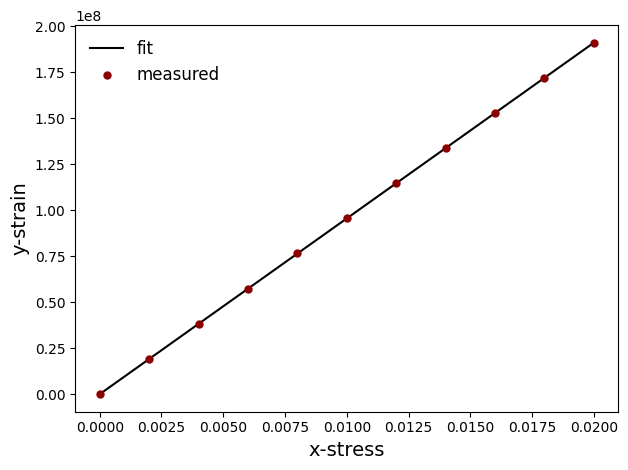

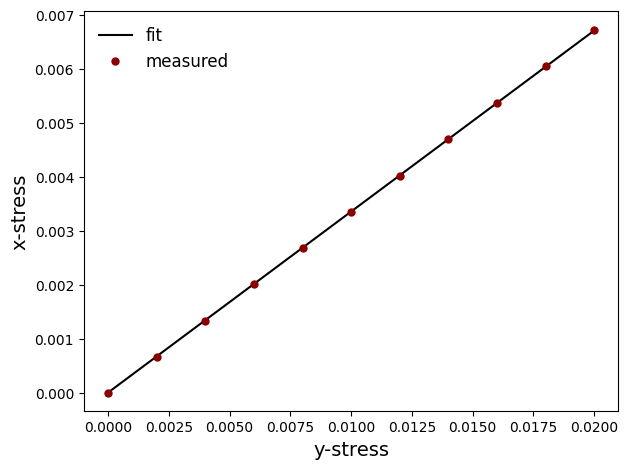

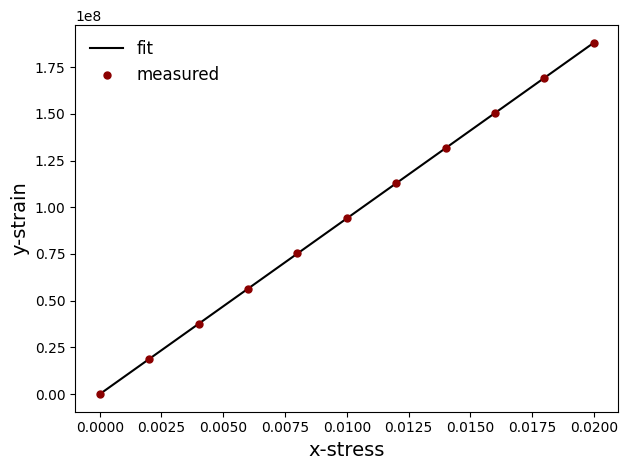

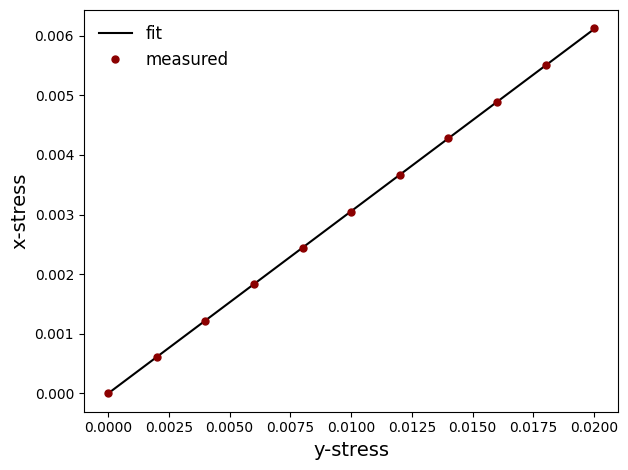

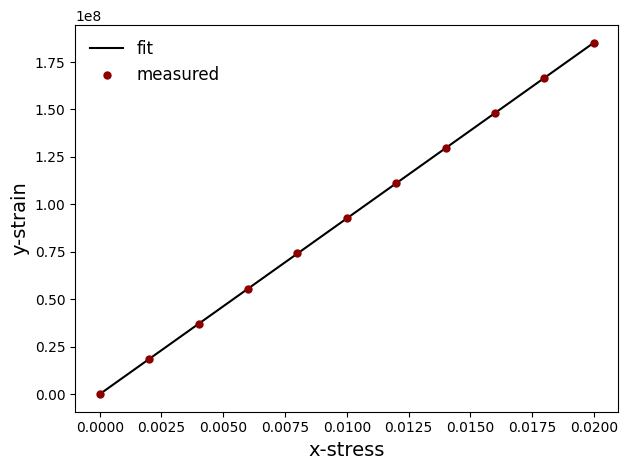

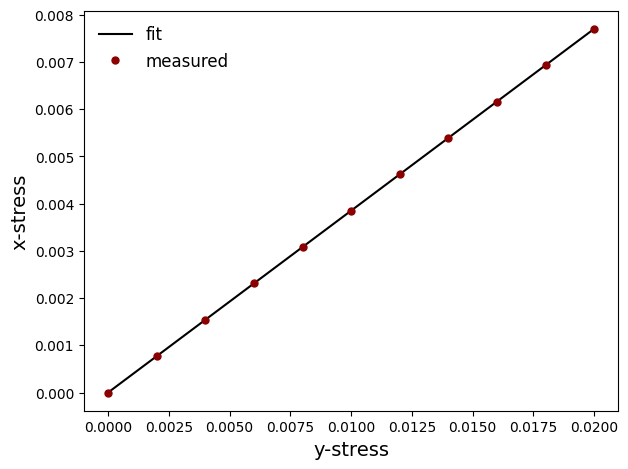

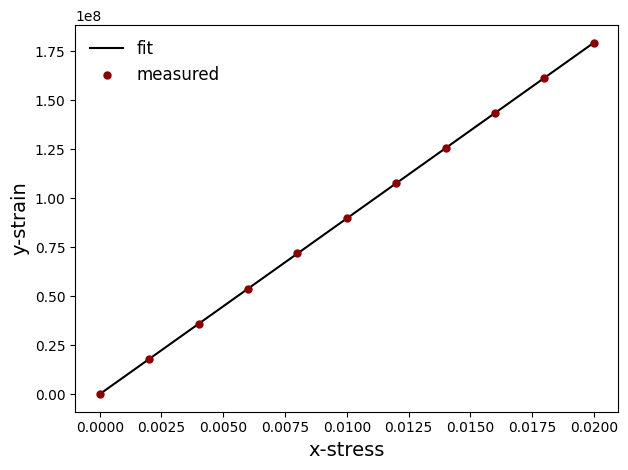

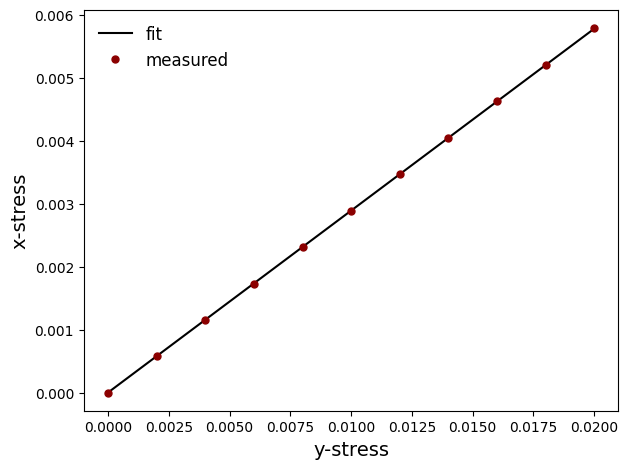

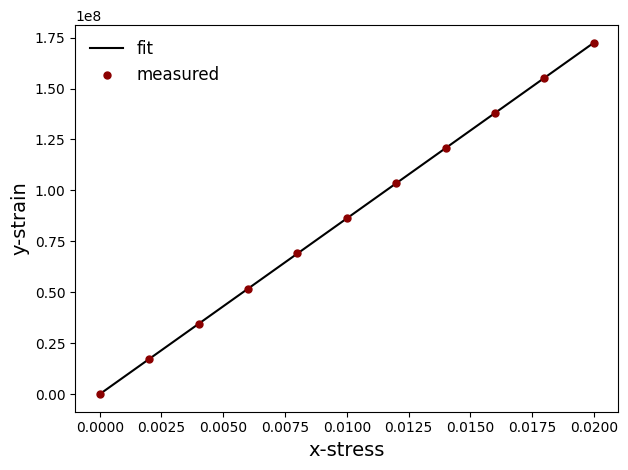

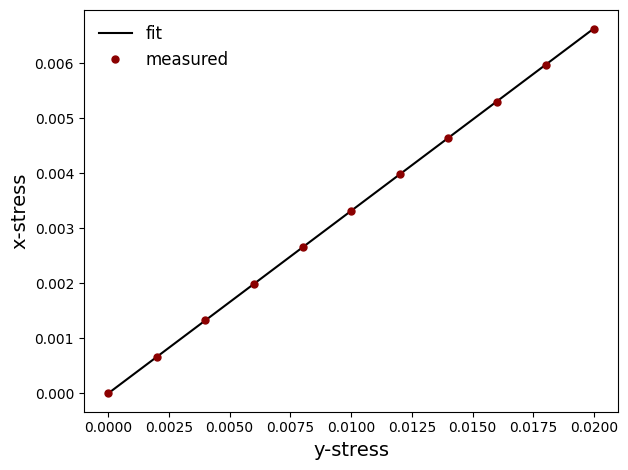

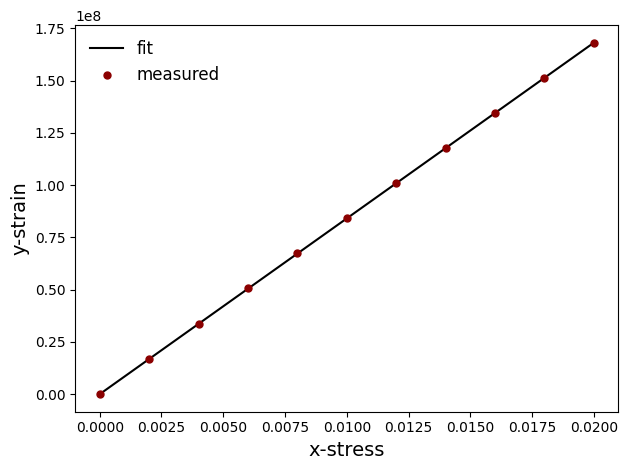

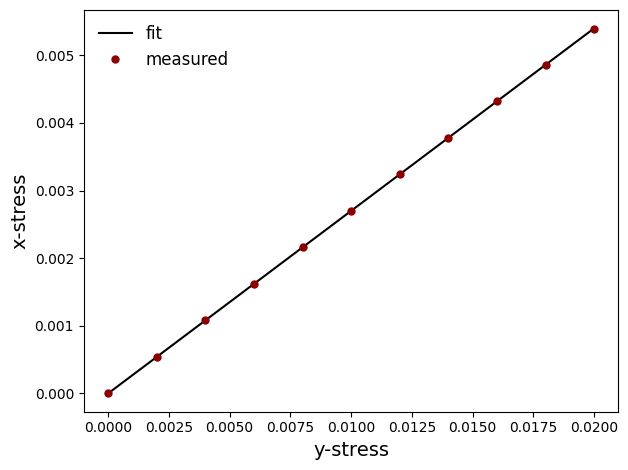

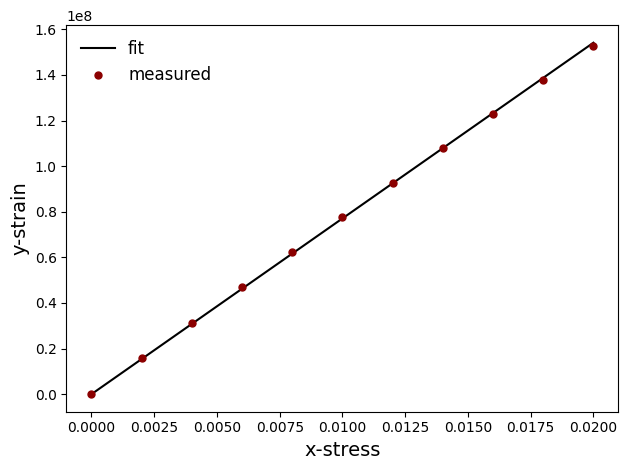

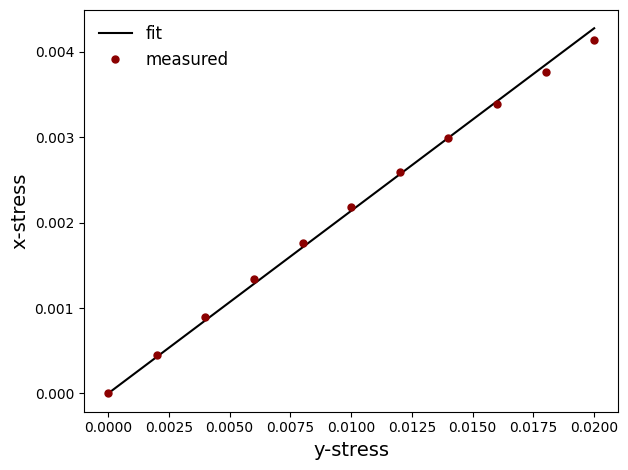

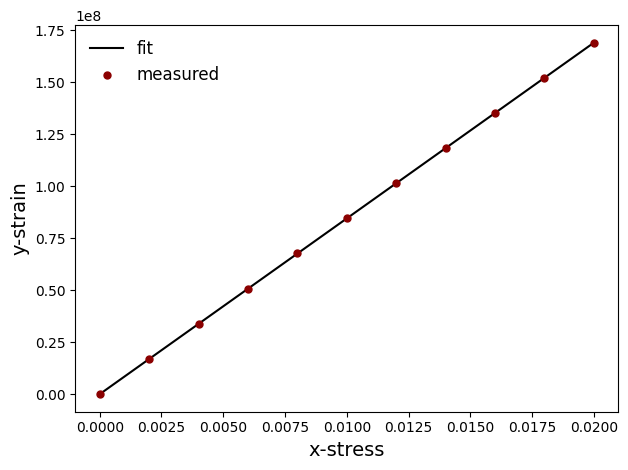

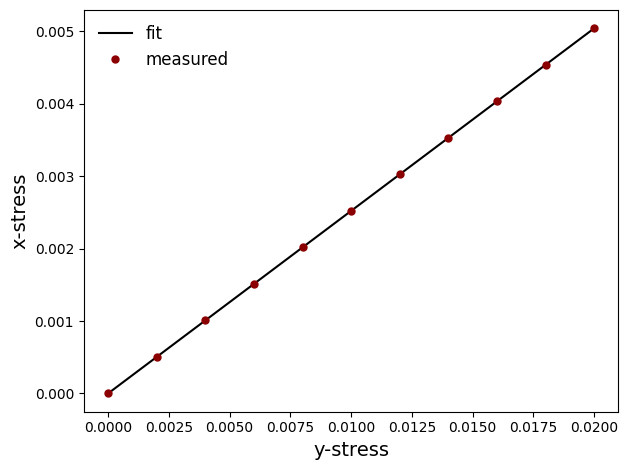

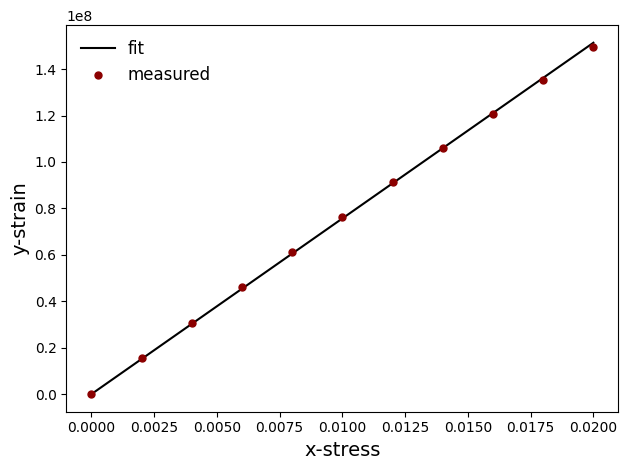

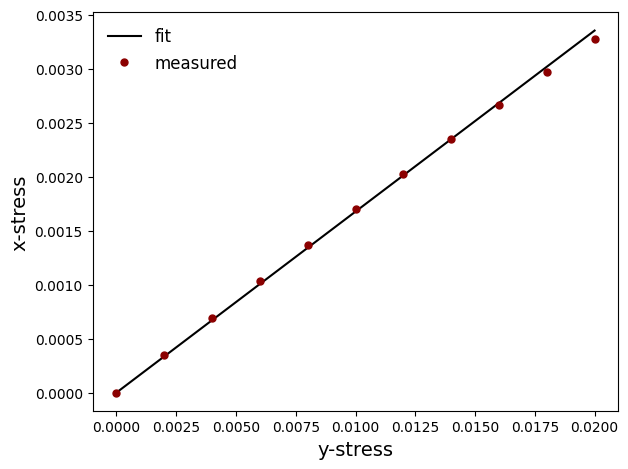

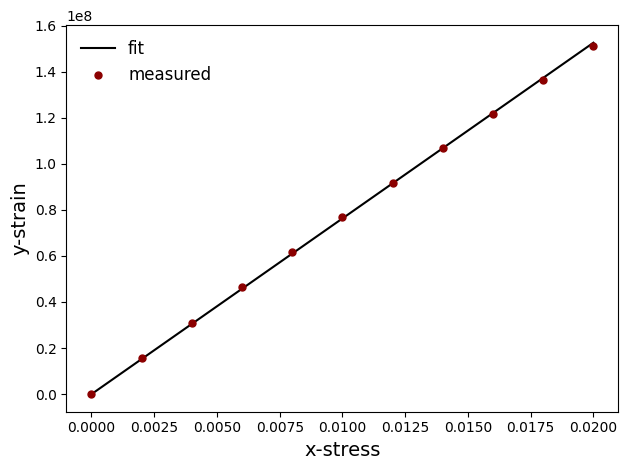

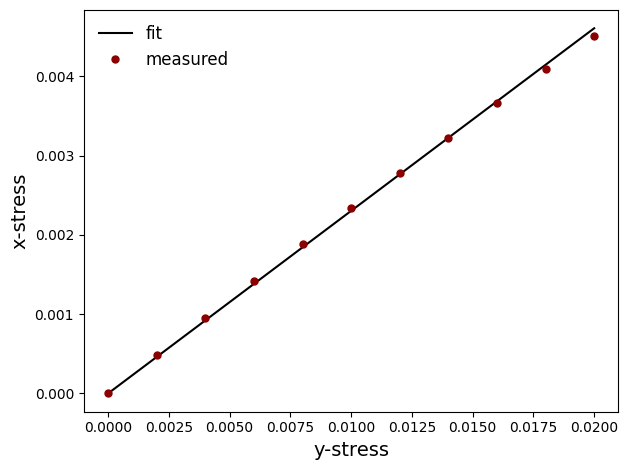

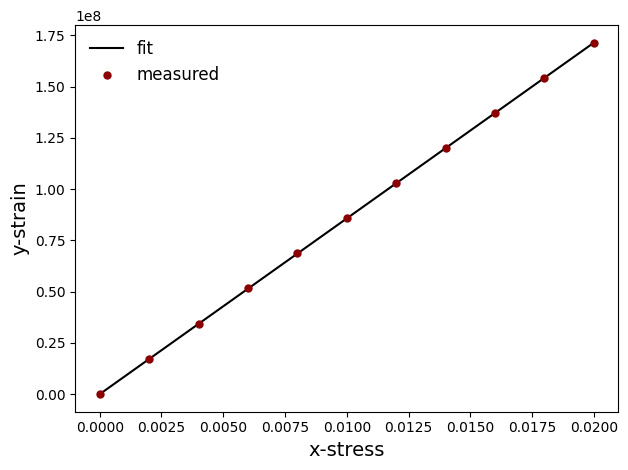

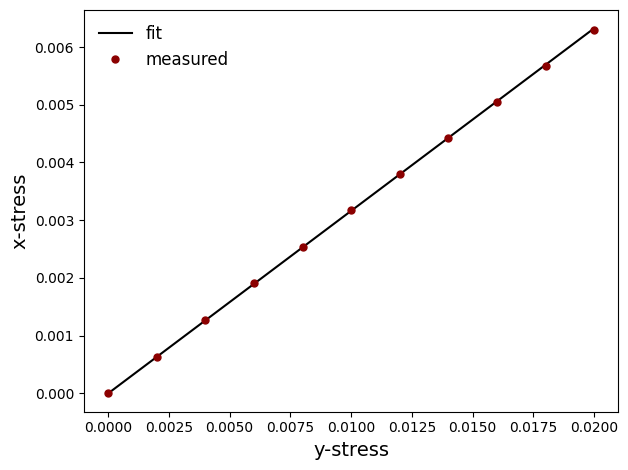

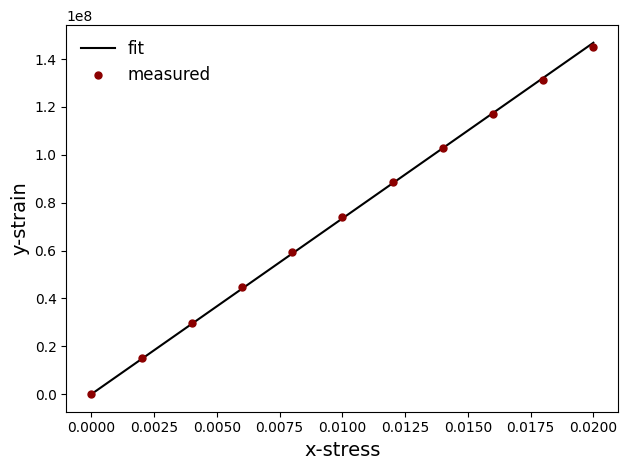

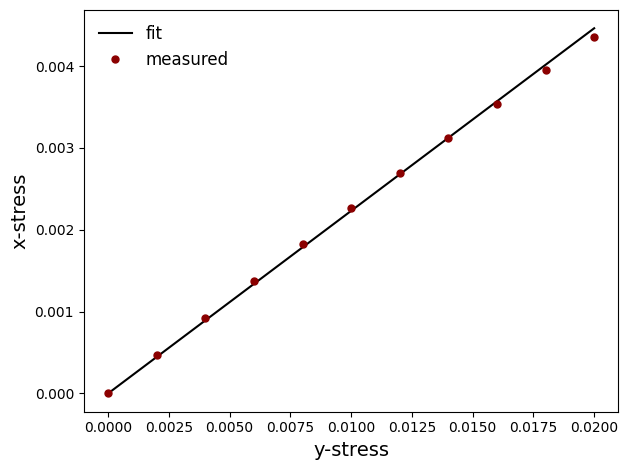

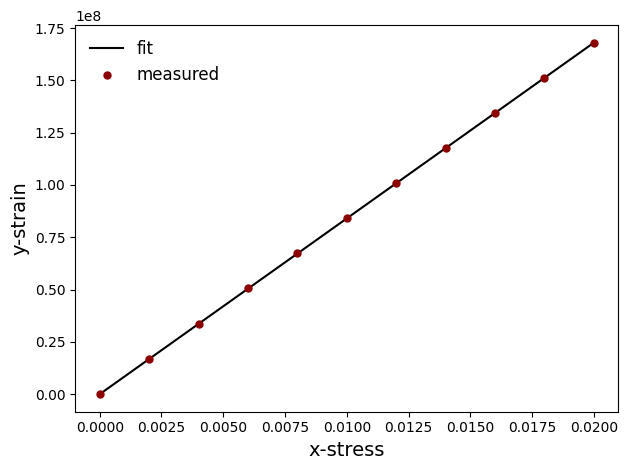

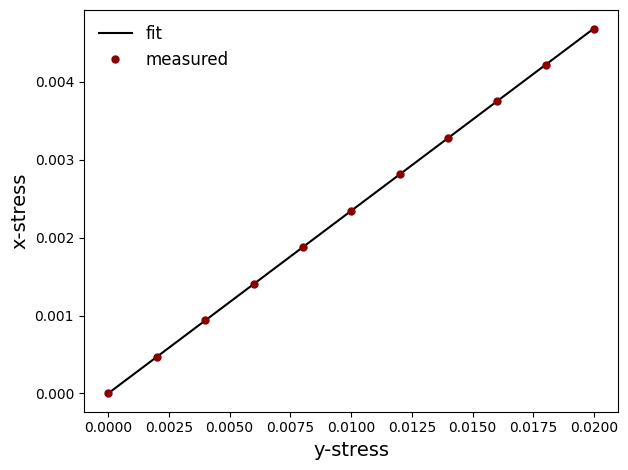

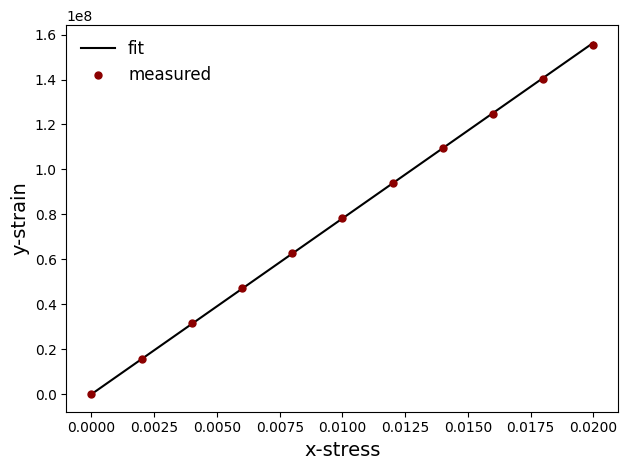

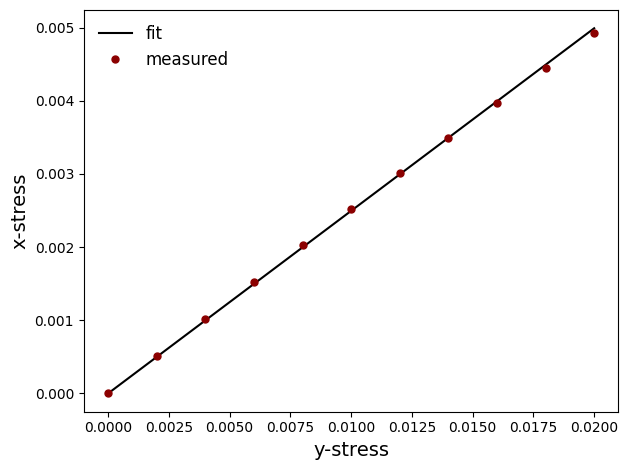

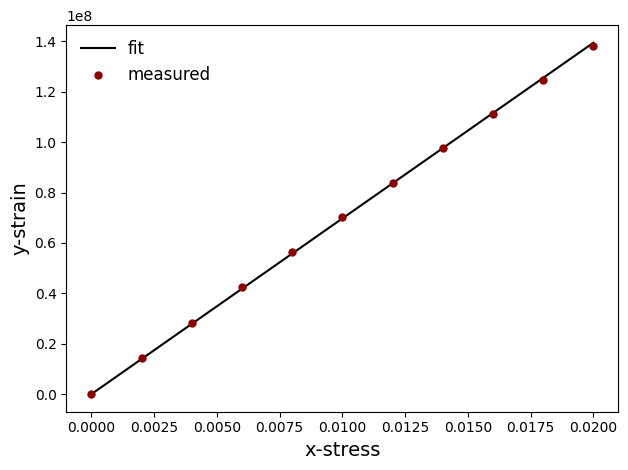

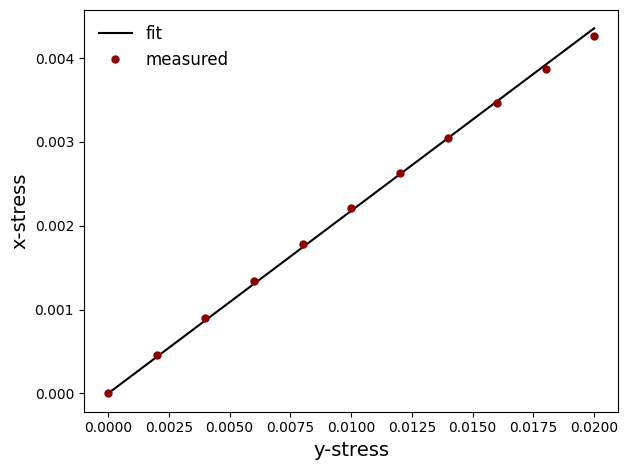

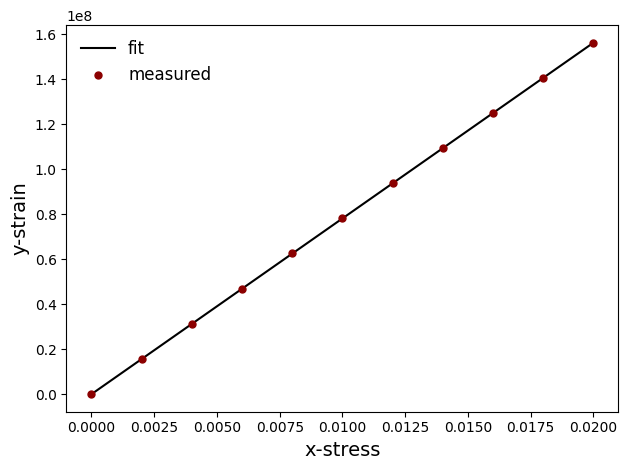

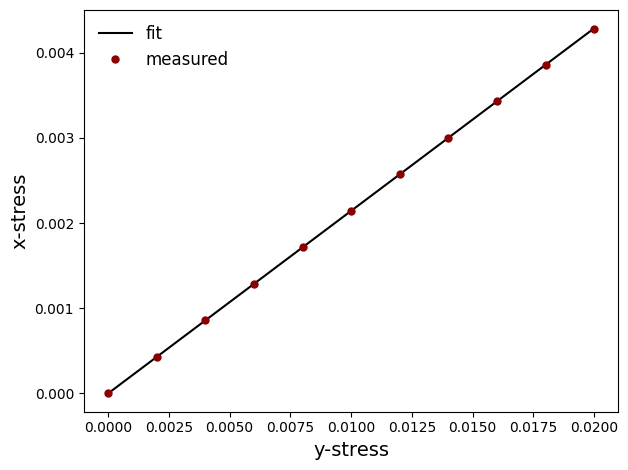

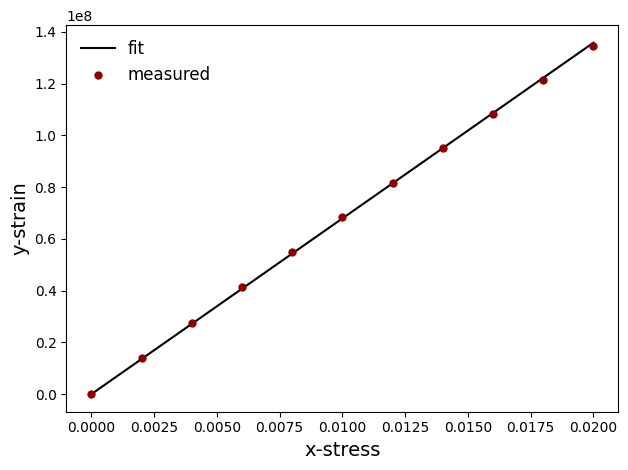

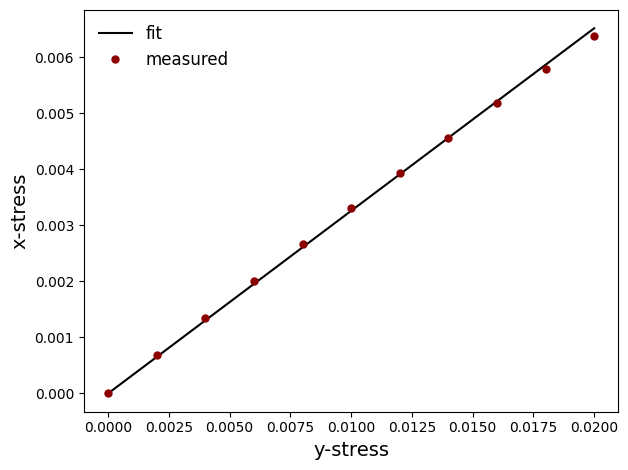

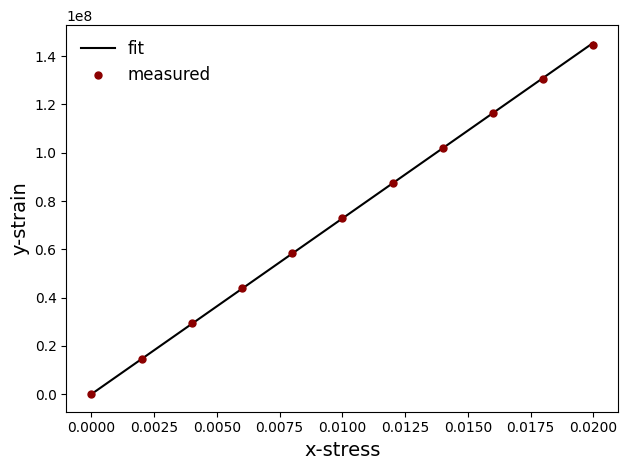

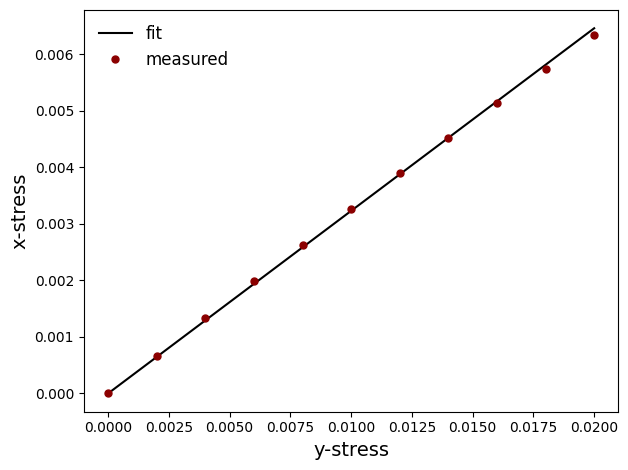

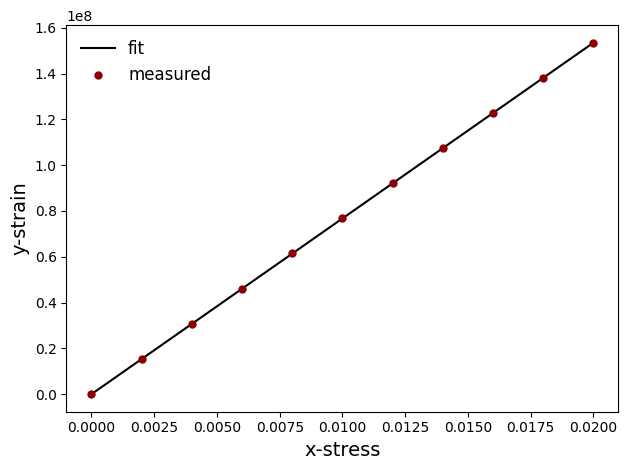

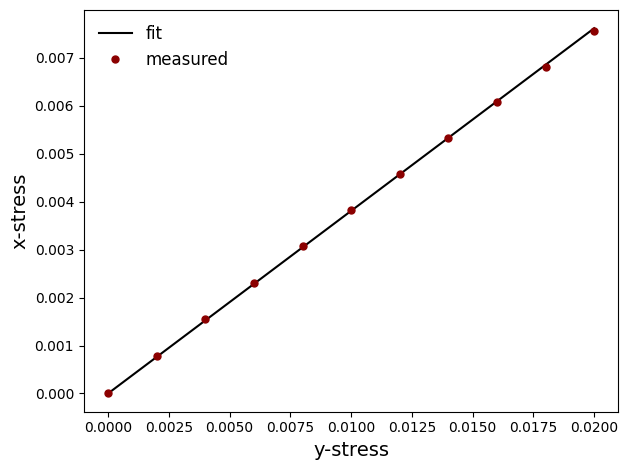

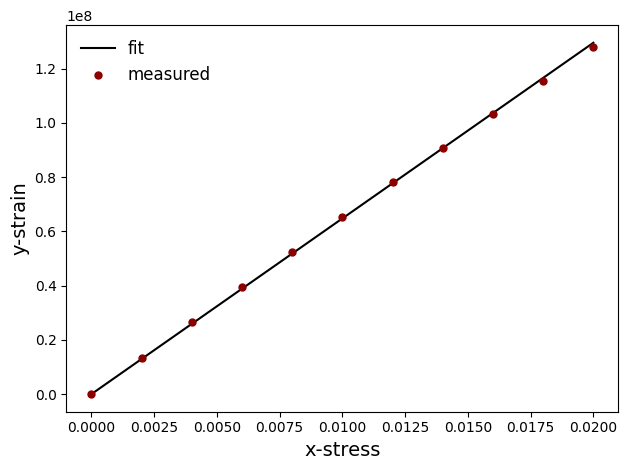

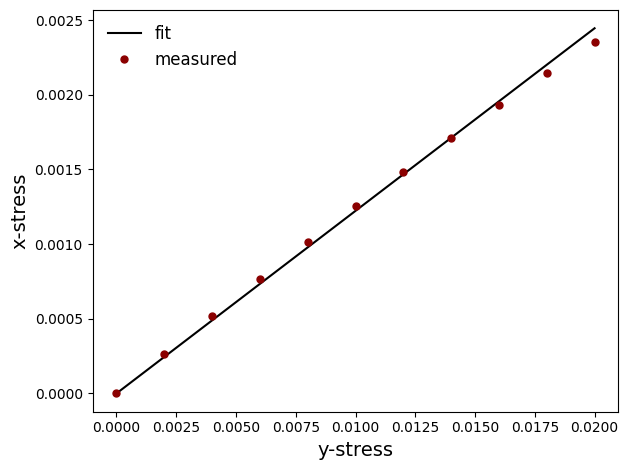

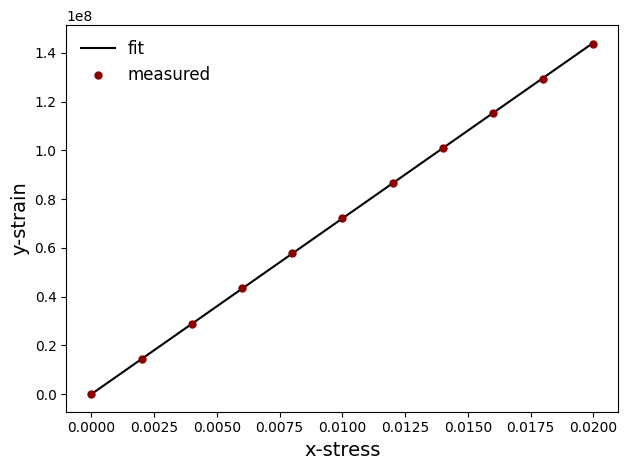

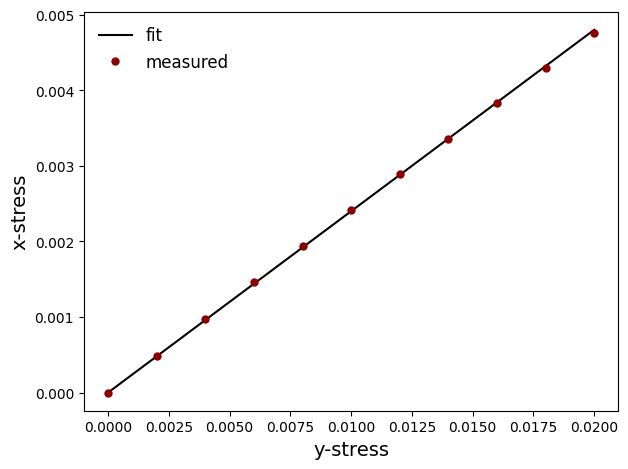

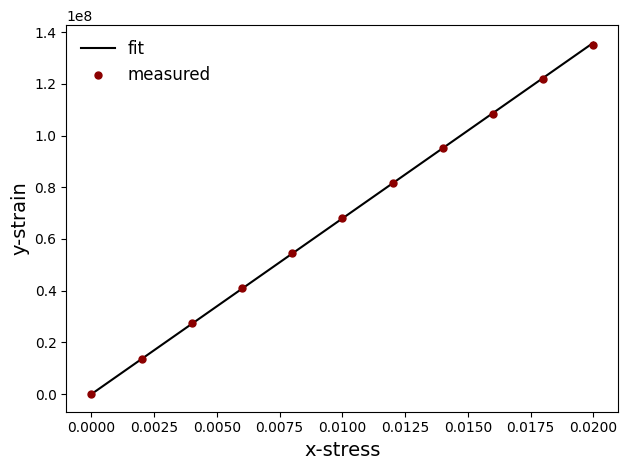

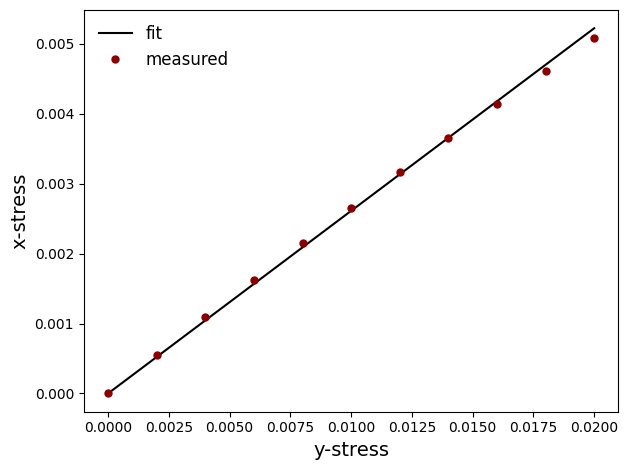

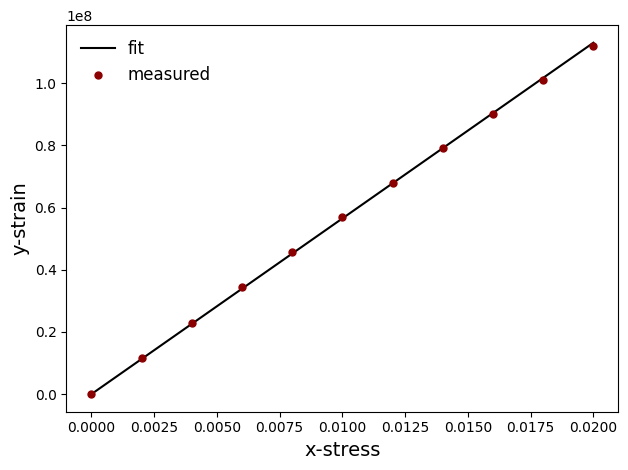

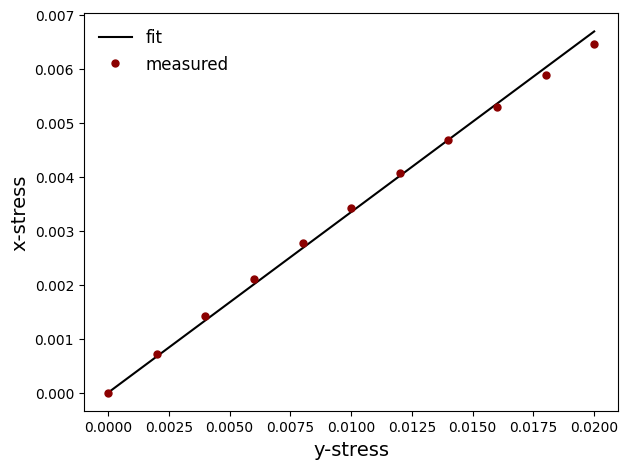

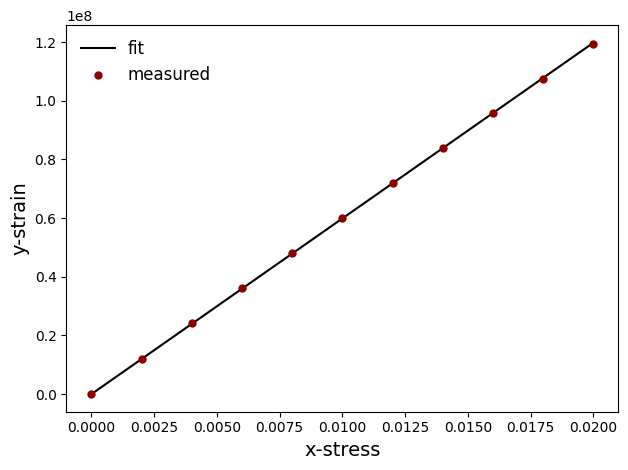

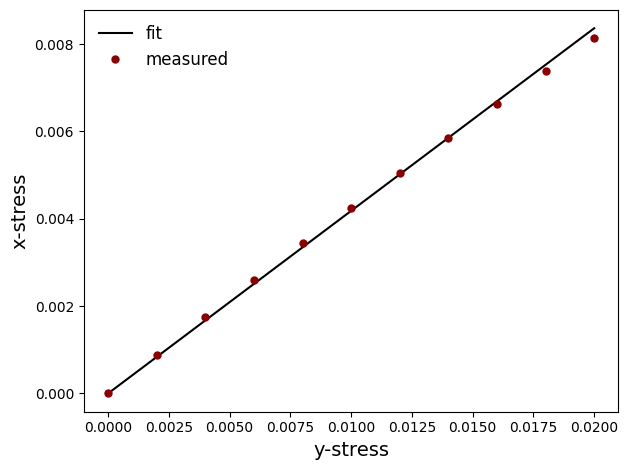

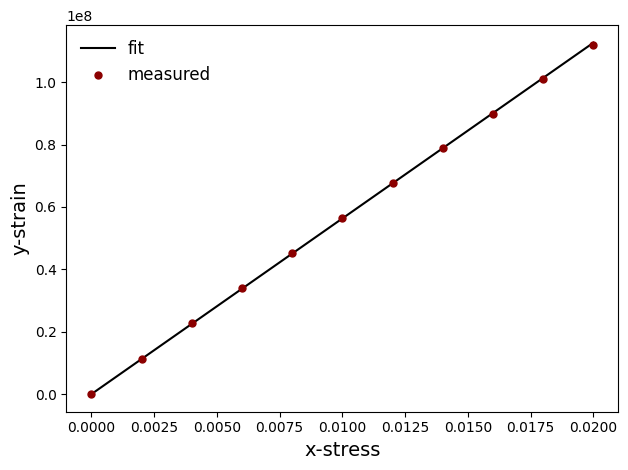

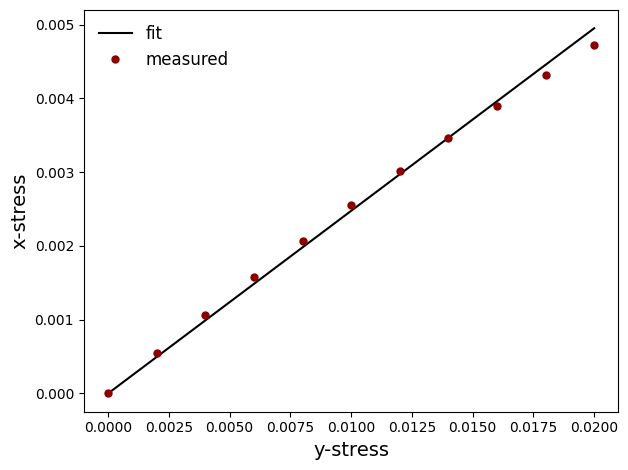

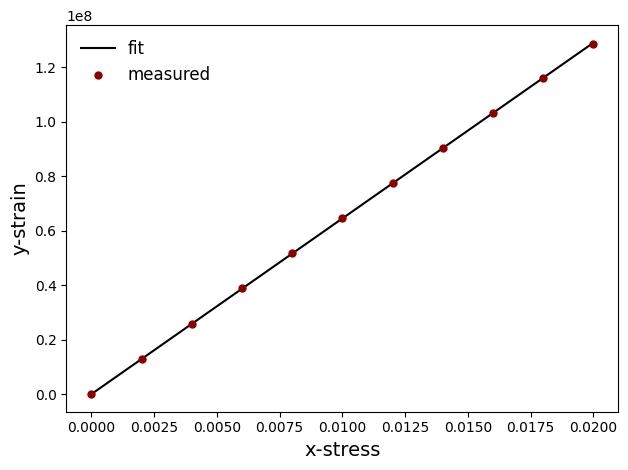

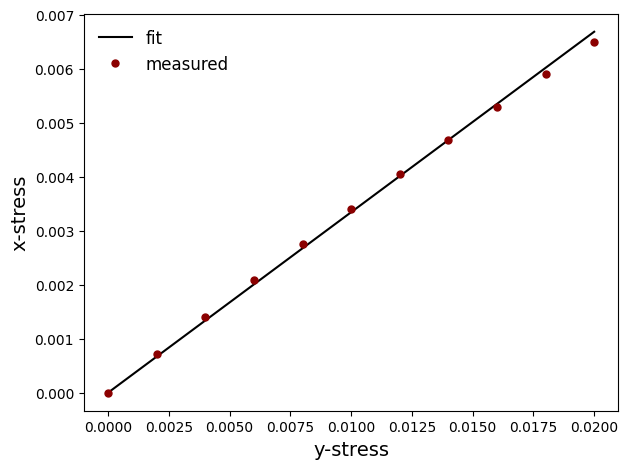

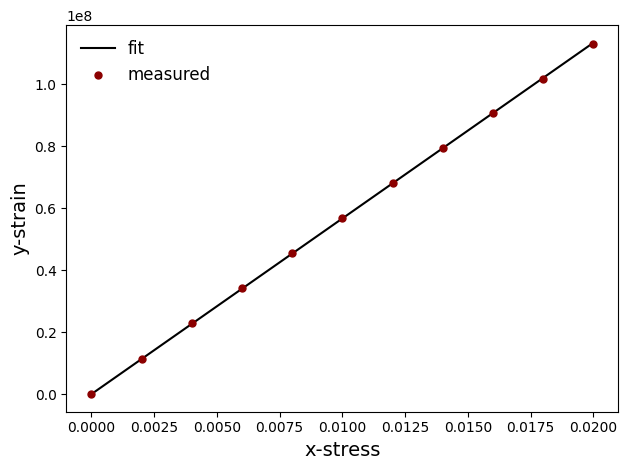

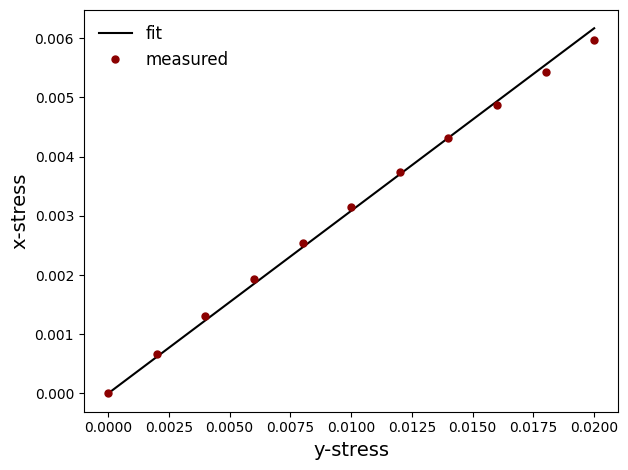

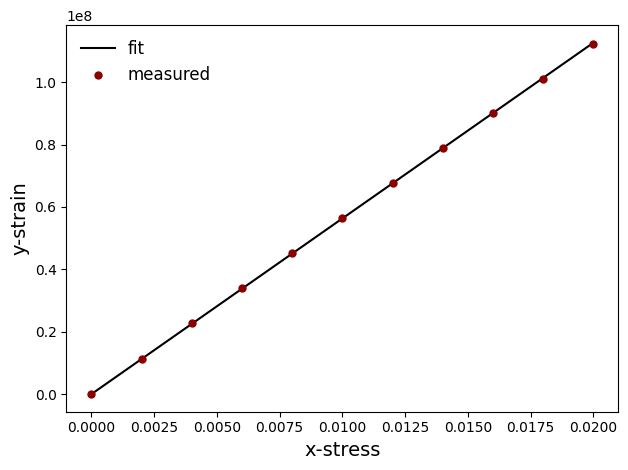

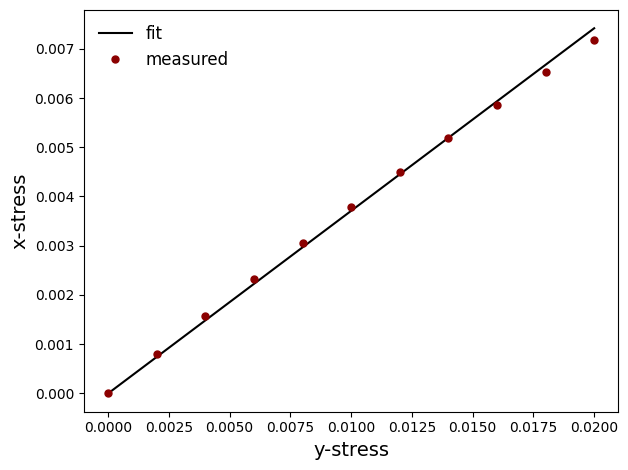

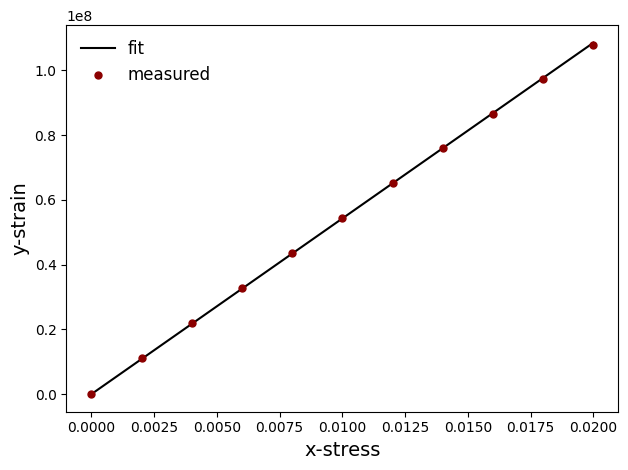

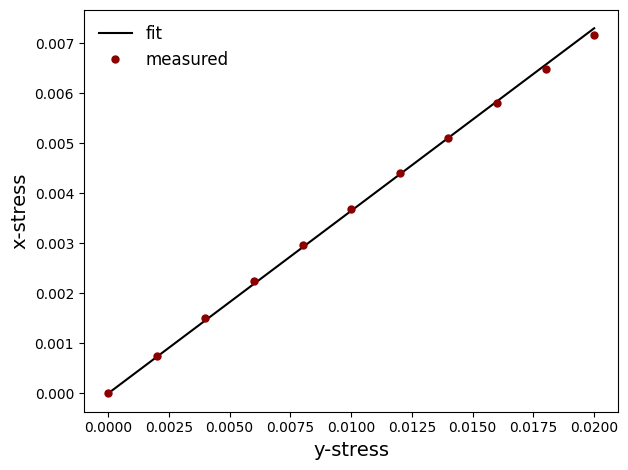

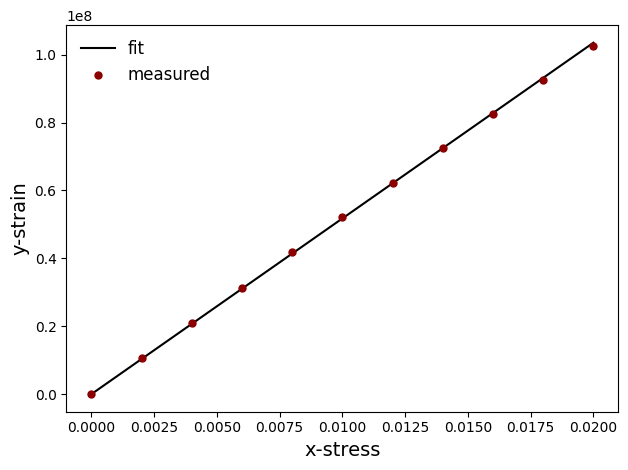

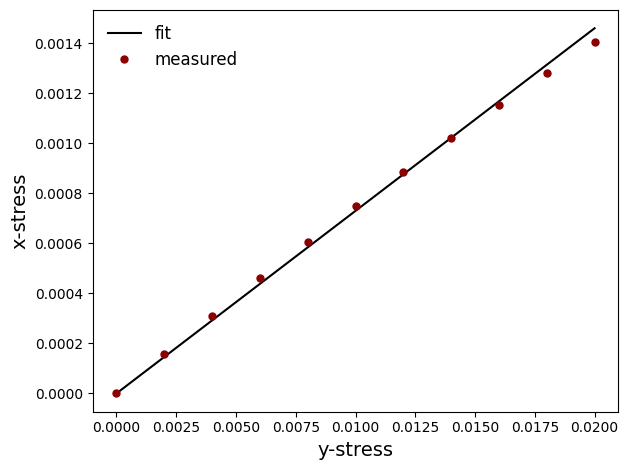

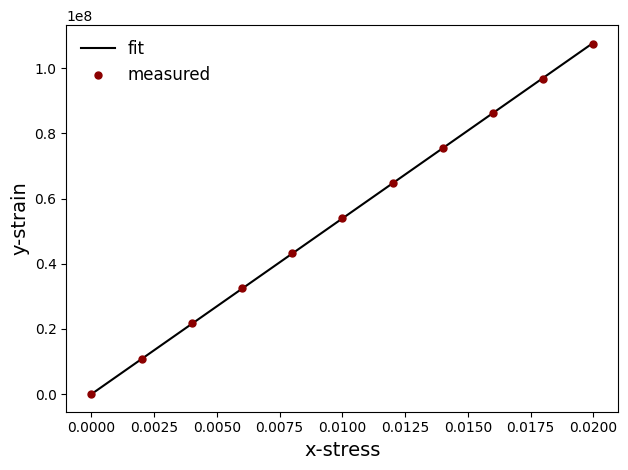

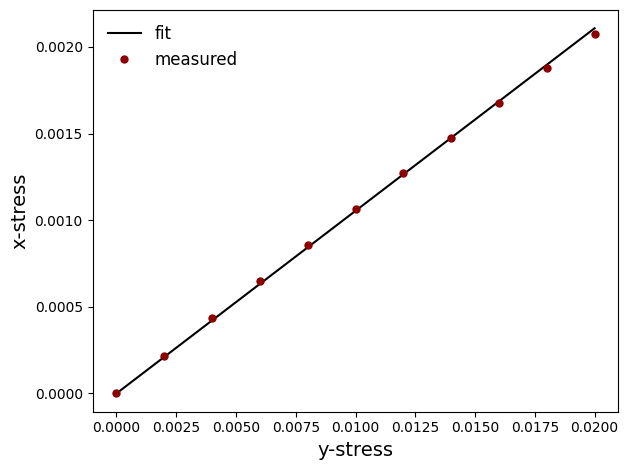

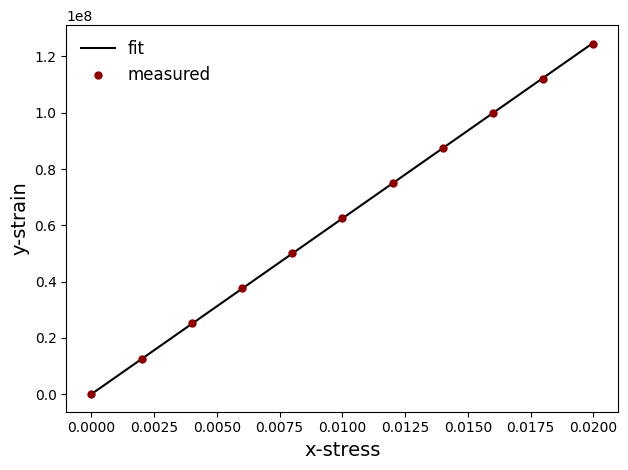

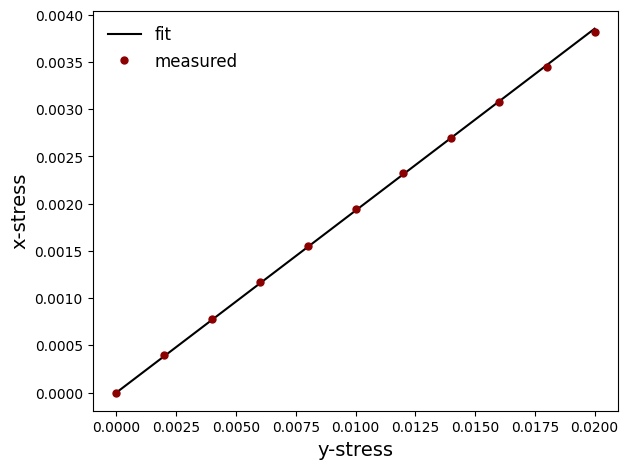

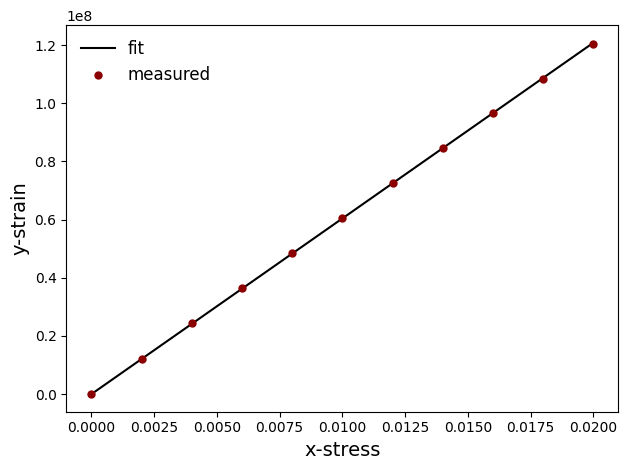

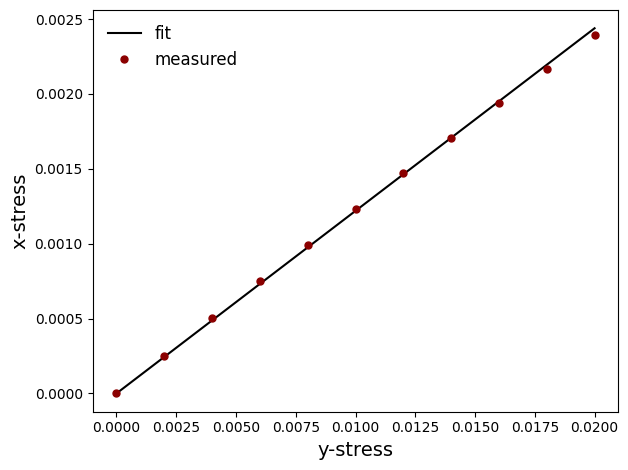

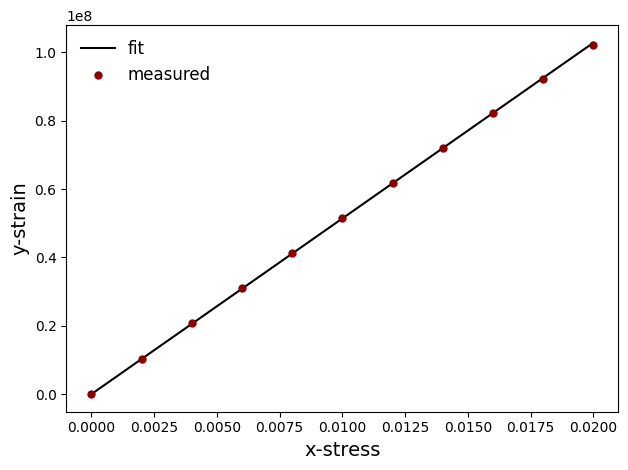

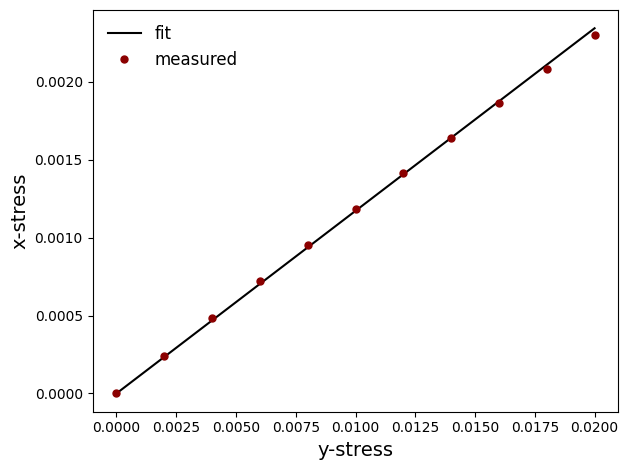

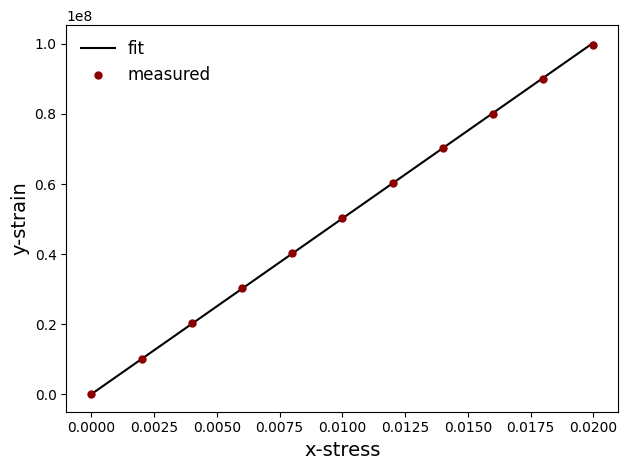

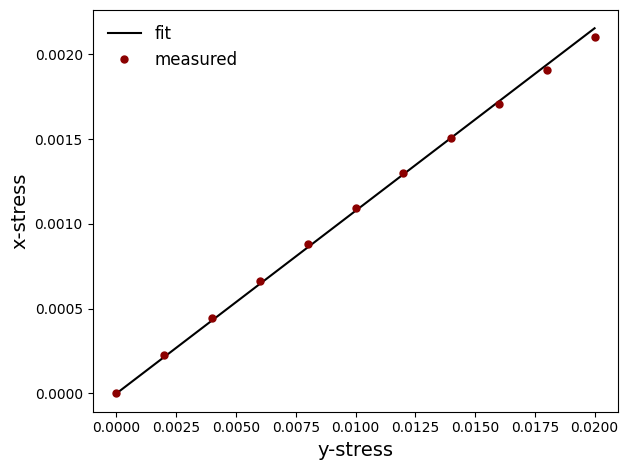

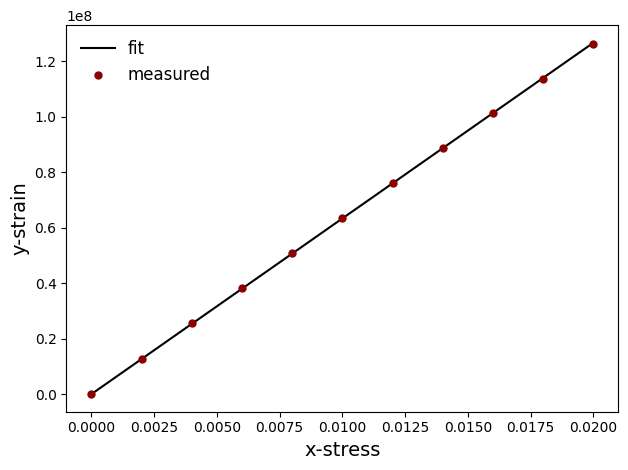

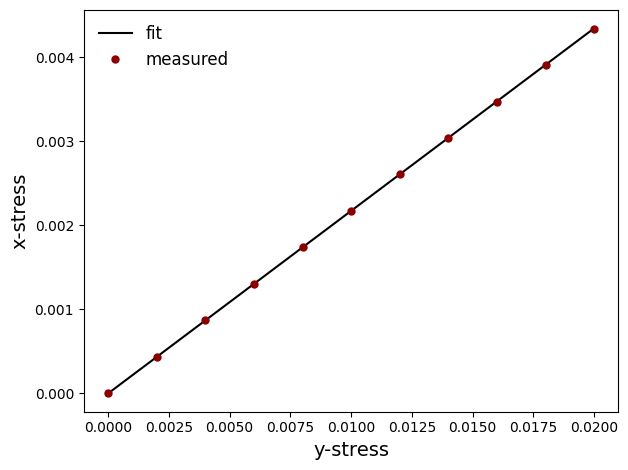

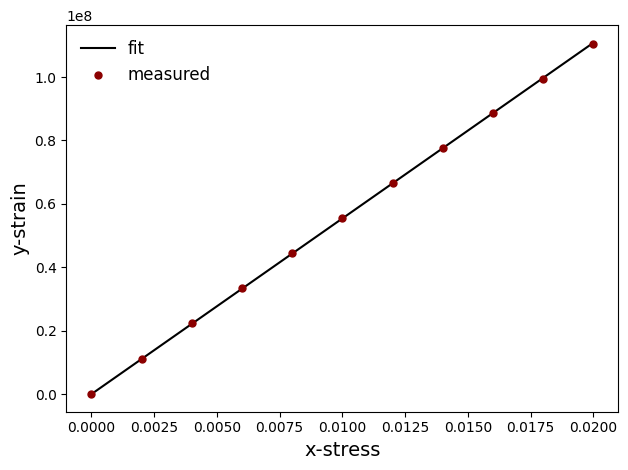

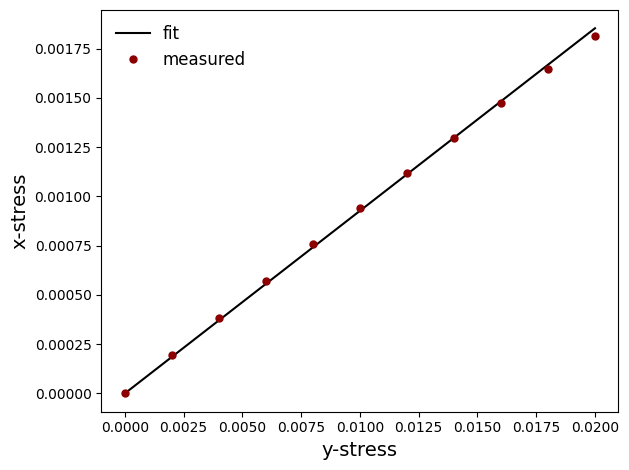

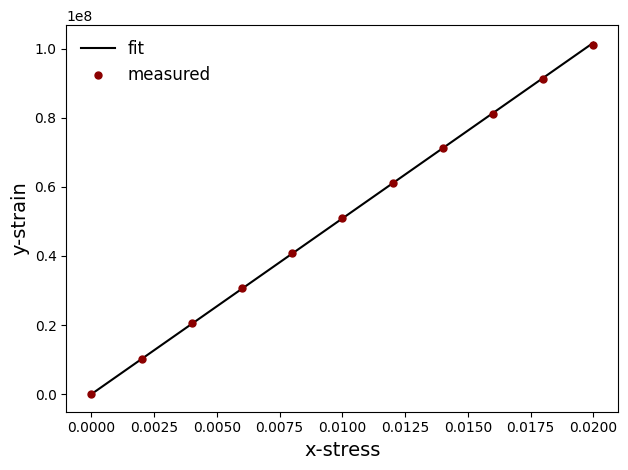

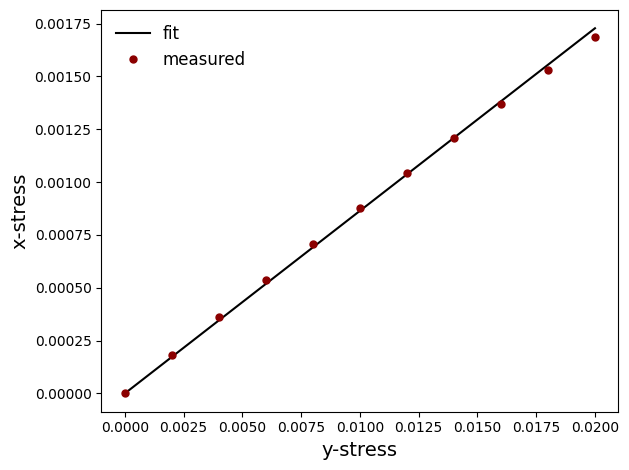

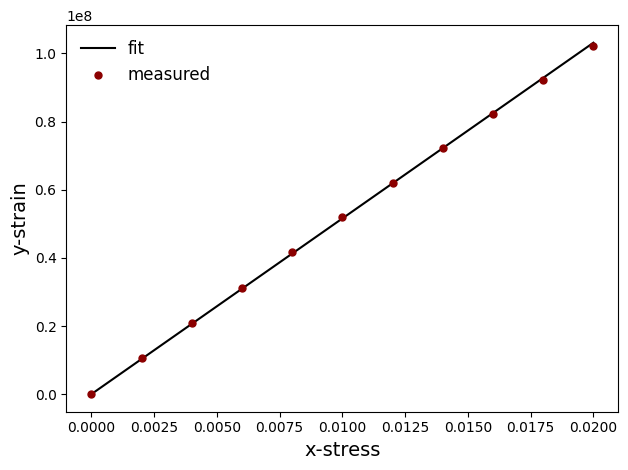

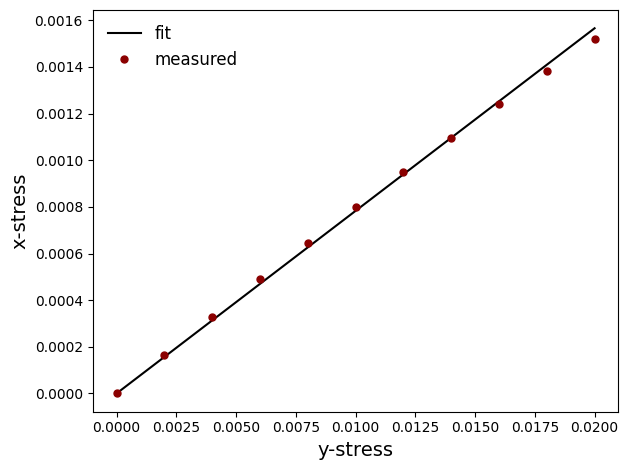

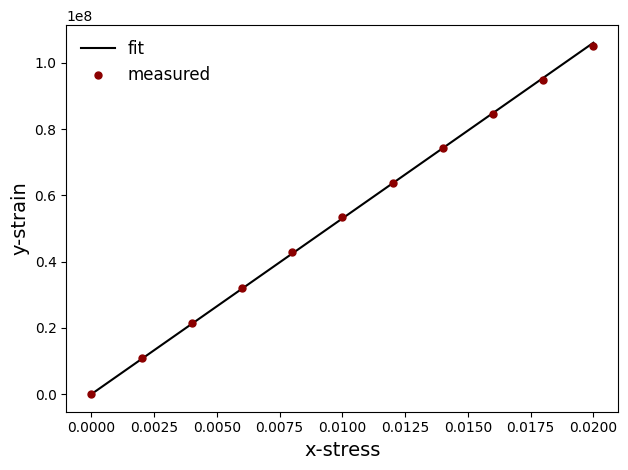

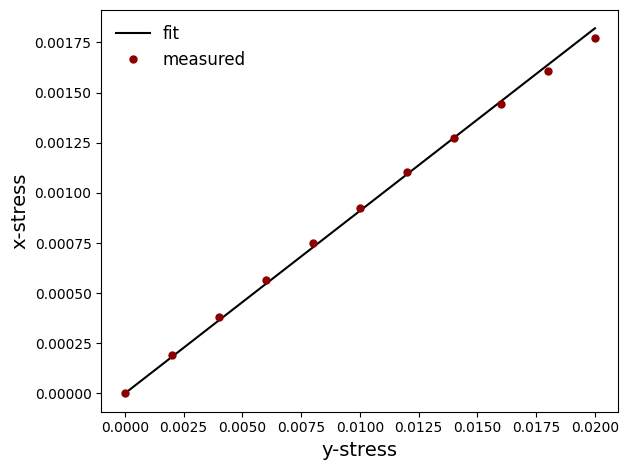

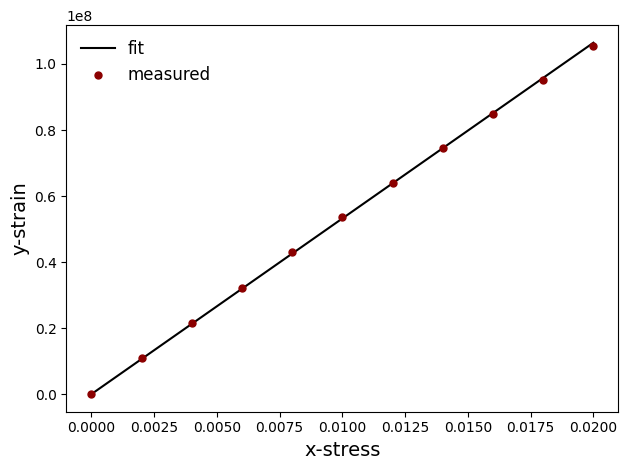

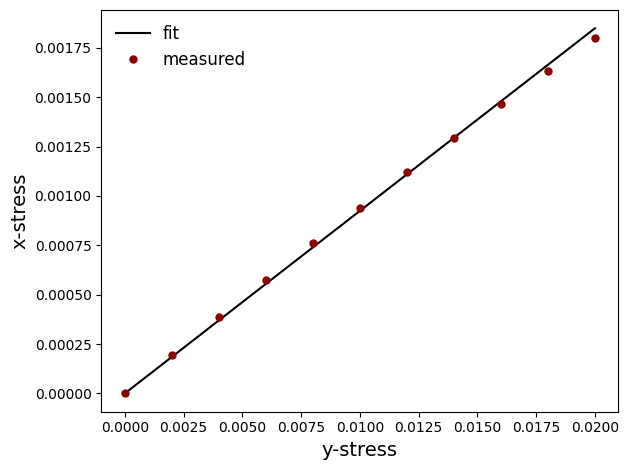

In [11]:
model.to('cpu')
# target stiffness (in rescaled units)
target_stiff = 0.4
# actual target (in real units)
actual_target = (target_stiff*max_stiff)+min_stiff

outer_nodes = lat.original.outer_nodes
outer_values = lat.coordinates[outer_nodes].detach()

lossf = torch.nn.L1Loss()
optimizer = torch.optim.Adam([{'params': lat.edge_mask, 'lr': 0.001},{'params': lat.coordinates, 'lr': 0.0001}], weight_decay = 1e-6)

experiment_setup = {'forced_nodes': lat.original.top_nodes,
                    'static_nodes': lat.original.bottom_nodes,
                    'displacement': 0.02/10.,
                    'num_steps': 10}

mm = FEModel()
original_density = float(lat.density.detach().numpy())
target_density = lat.density

rec = RecordAndSave('results', 'GNN-InverseDesign')
rec.add({'target_stiff': actual_target, 'target_dens': target_density})

model_stiff = []
real_stiff = []
collected_density = []
for j in trange(201):
    optimizer.zero_grad()
    stiff = model(lat_graph, lat.threshold_function(lat.edge_mask.unsqueeze(1)))
    model_stiff.append((float(stiff.detach().numpy())*max_stiff)+min_stiff)
    # every 5 steps, calculate values obtained from actual FE analysis
    if j % 5 == 0:
        actual_stiff, _, dr = get_Yprop(lat, mm, experiment_setup)
        real_stiff.append(float(actual_stiff.detach().numpy()))
        rec.add({'actual_stiff': actual_stiff, 'delta': dr})
    density = lat.density
    rec.add({'edges': torch.Tensor(lat.active_edges), 'coords': lat.coordinates, 'stiff': (stiff*max_stiff)+min_stiff, 'den': density})
    print(stiff, lat.density)
    loss = lossf(stiff, torch.tensor([target_stiff]))+100*lossf(lat.density, torch.tensor([target_density]))
    loss.backward()
    optimizer.step()
    lat.coordinates.data[outer_nodes] = outer_values

#### Plot the found lattice design

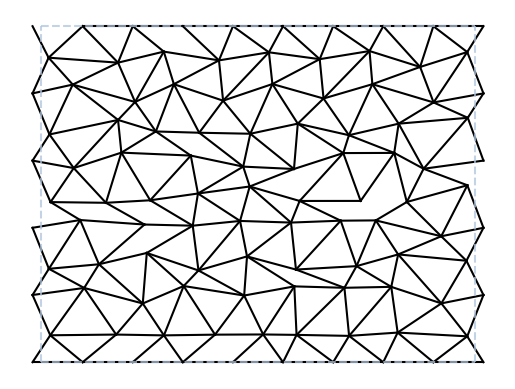

In [14]:
lat.draw_lattice(original_coords=False)

#### Plot effective elastic modulus during training
Red: values obtained using FE

Blue/dashed: values obtained using GNN

Line: target value

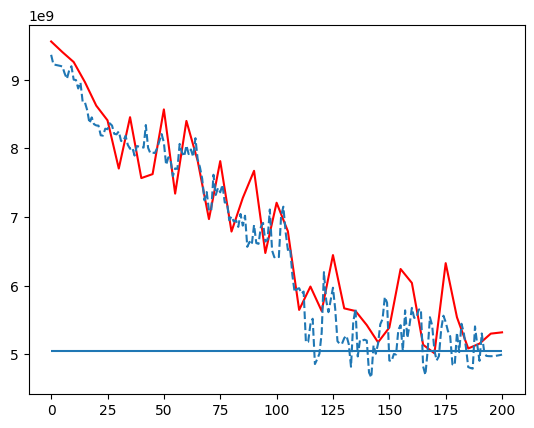

In [12]:
plt.plot(np.arange(0, len(rec['actual_stiff']))*5, rec['actual_stiff'], color = 'r')
plt.plot(rec['stiff'], linestyle= '--')
plt.hlines(actual_target, 0,200)

#### Relative density during inverse design
Dashed: relative density

Line: target relative density

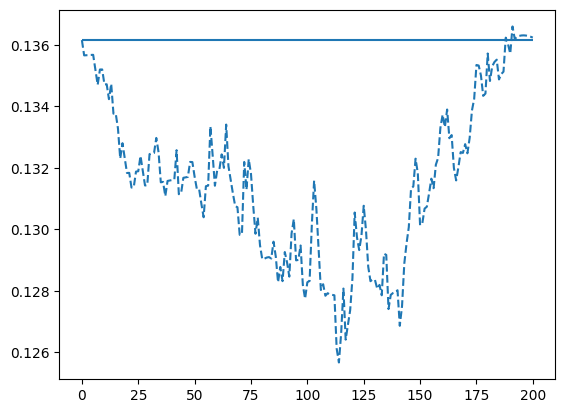

In [13]:
plt.plot(rec['den'], linestyle= '--')
plt.hlines(rec['target_dens'], 0,200)

#### Save recorded data

In [14]:
rec.save()